# **Wine Quality - Exploratory Data Analysis**
-----------------------------
## **Context**
-----------------------------

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). https://archive.ics.uci.edu/ml/datasets/wine+quality , I


In this workbook, we will Work on doing univariate and multivariate wine quality EDA

-----------------------------
## **Dataset** 
-----------------------------
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

##### Step 0 - Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/Winequality/winequality-red.csv')

##### Step 1- Initial inspection

In [2]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
print(df.columns)
print(df.index)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
RangeIndex(start=0, stop=1599, step=1)


In [4]:
df.shape #check the shape

(1599, 12)

In [5]:
df.info() #check for null values and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Step 2 - EDA on numeric columns

In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

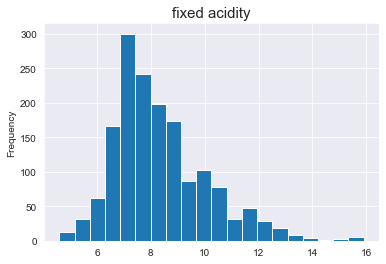

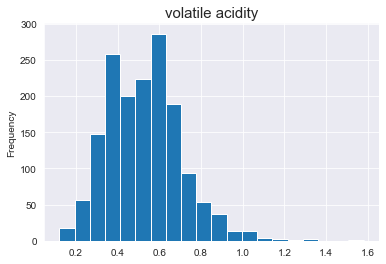

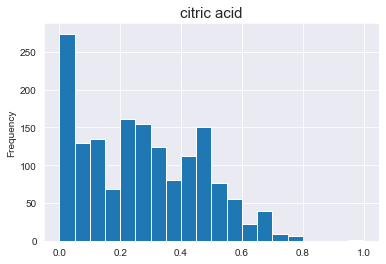

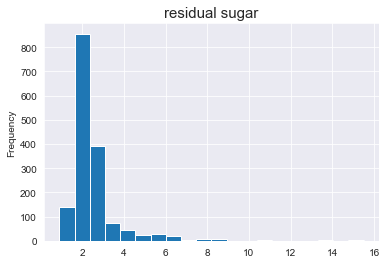

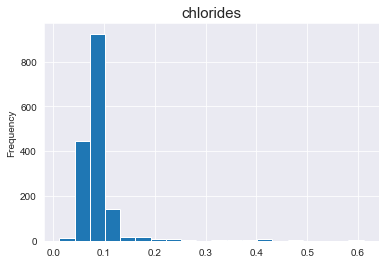

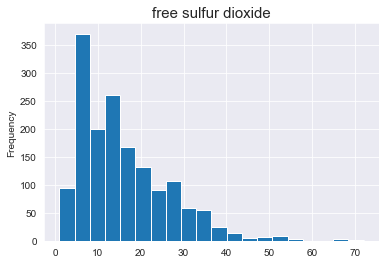

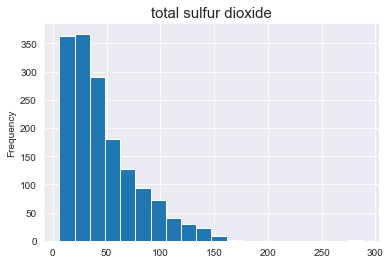

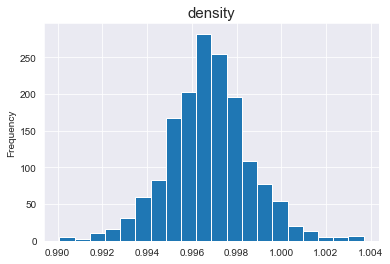

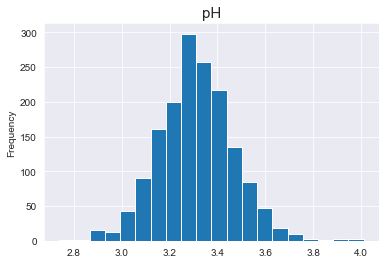

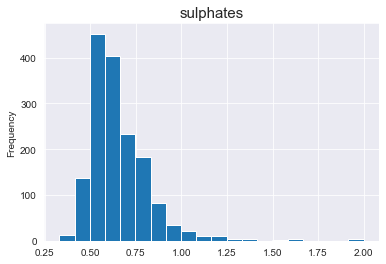

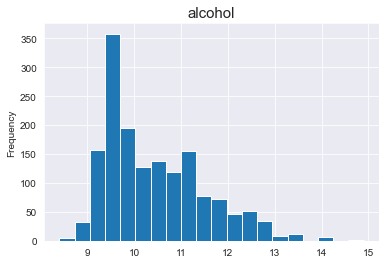

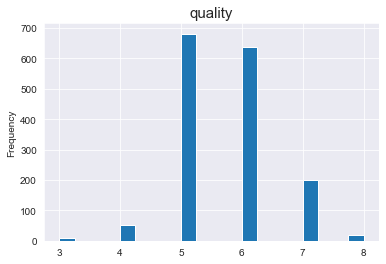

In [7]:
#lets plot histograms using pandas first
sns.set_style('darkgrid')
for i in df.columns:
    df[i].plot.hist(bins=20)
    plt.title(i,fontsize=15)
    plt.show()

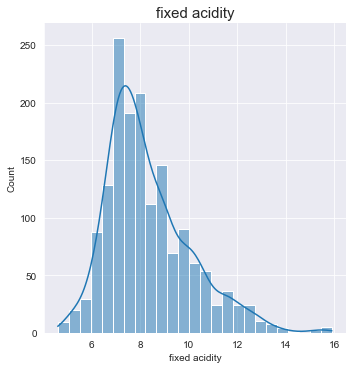

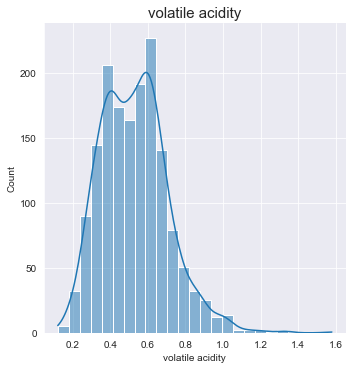

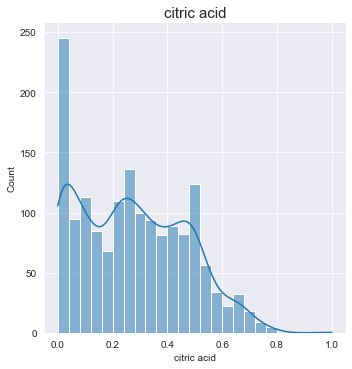

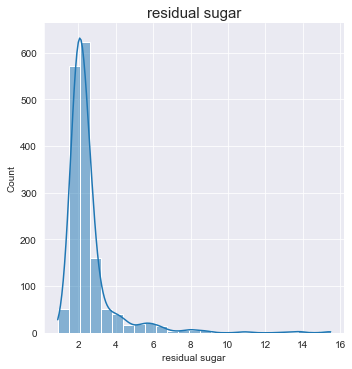

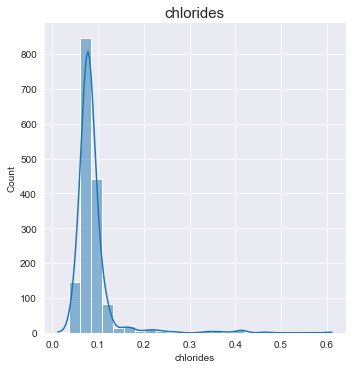

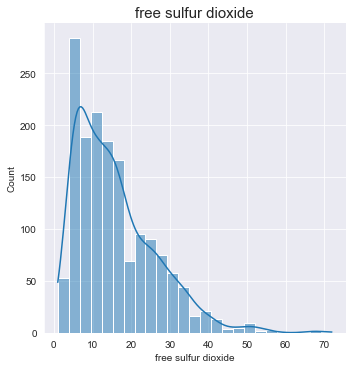

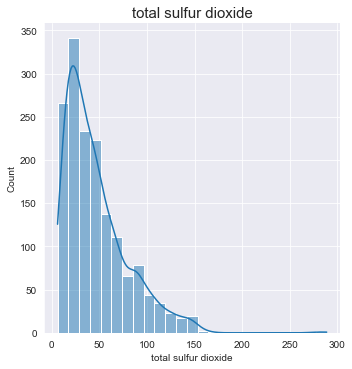

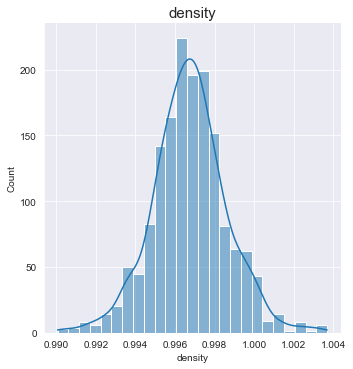

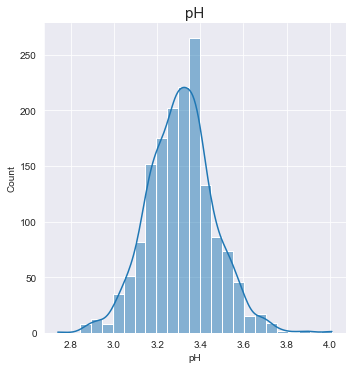

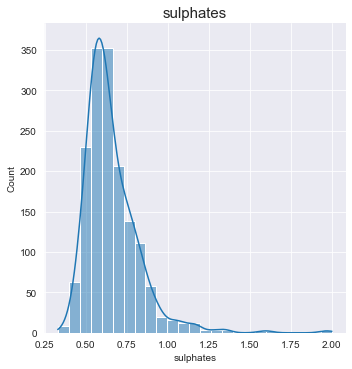

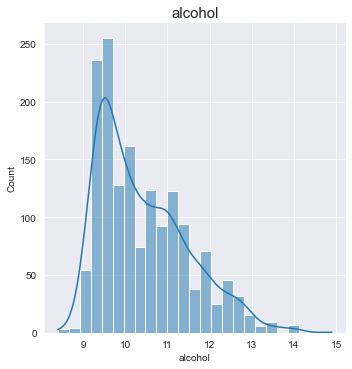

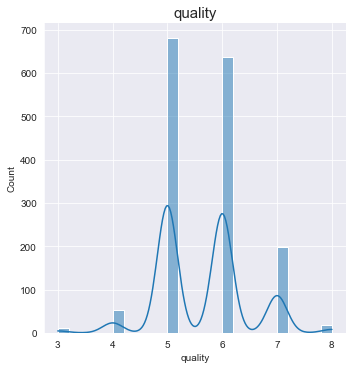

In [8]:
#now lets plot histograms using seaborn and kde
for i in df.columns:
    sns.displot(df[i],bins=25,kde=True)
    plt.title(i,fontsize=15)

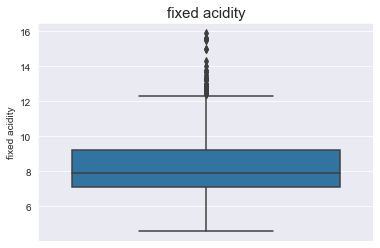

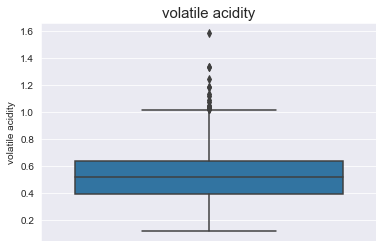

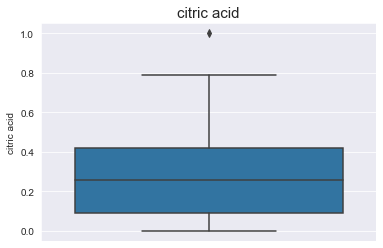

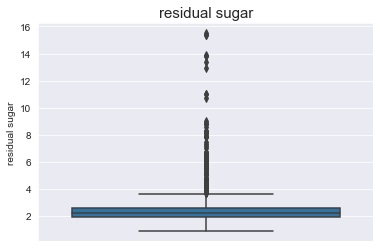

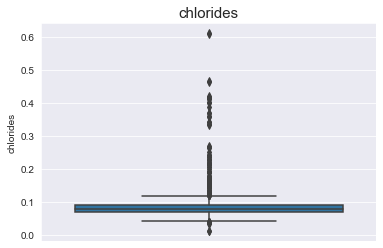

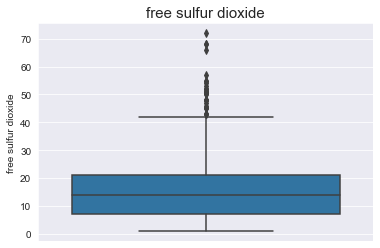

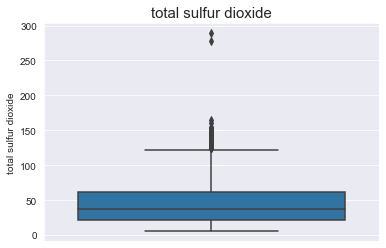

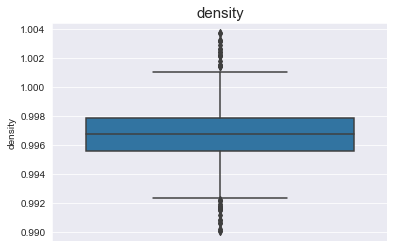

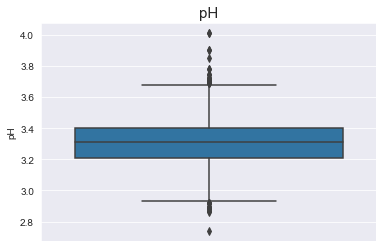

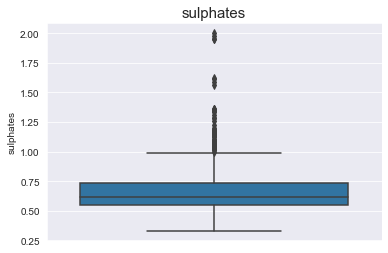

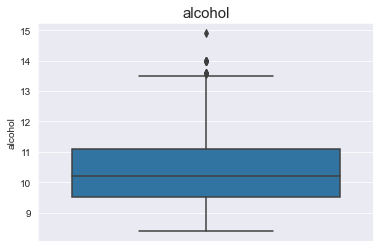

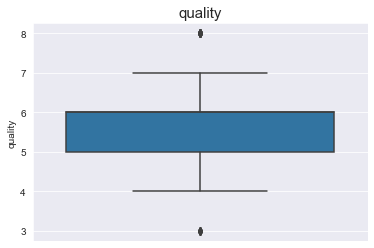

In [9]:
#Another way to look at how much the data is spread out and idendify outliers is using box plots

for i in df.columns:
    sns.boxplot(y=df[i],data=df)
    plt.title(i,fontsize=15)
    plt.show()

In [10]:
for i in df.columns:
    print(i,df['quality'].corr(df[i]))

fixed acidity 0.12405164911322426
volatile acidity -0.3905577802640073
citric acid 0.22637251431804137
residual sugar 0.013731637340066289
chlorides -0.1289065599300527
free sulfur dioxide -0.05065605724427639
total sulfur dioxide -0.18510028892653782
density -0.17491922778334879
pH -0.05773139120538215
sulphates 0.2513970790692614
alcohol 0.4761663240011361
quality 1.0


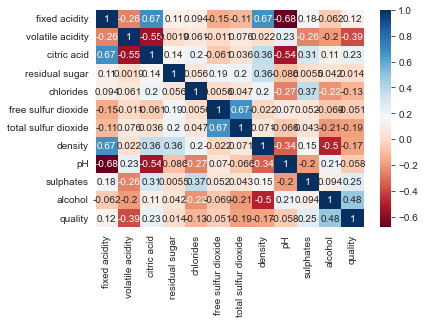

In [11]:
sns.heatmap(df.corr(),annot=True, cmap='RdBu')
plt.rcParams['figure.figsize']=10,10

In [12]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

fixed acidity volatile acidity


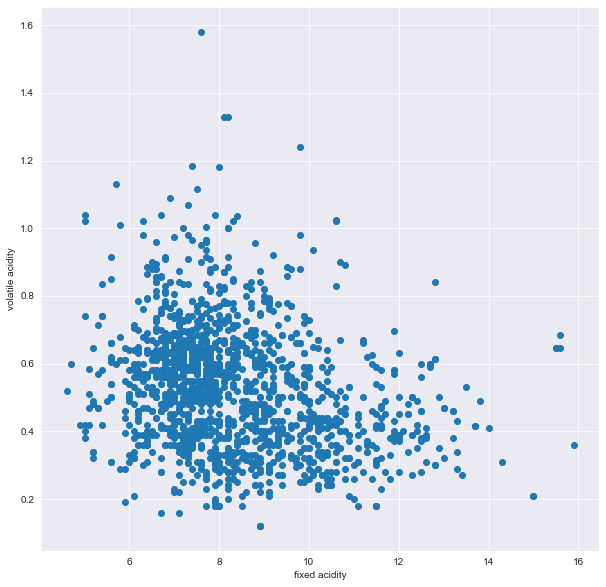

fixed acidity citric acid


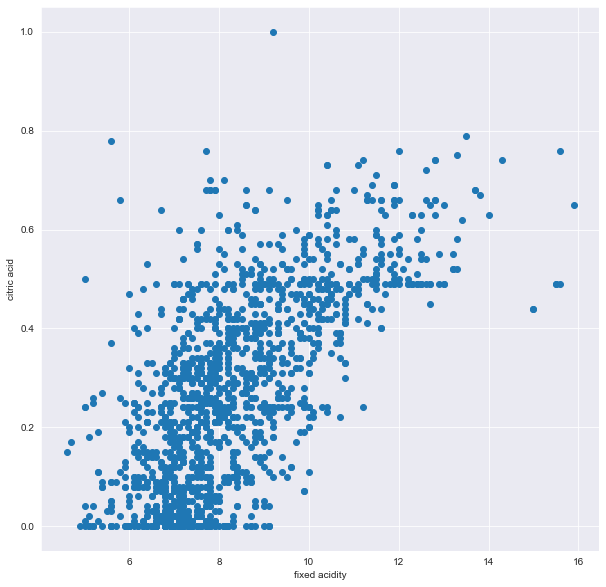

fixed acidity residual sugar


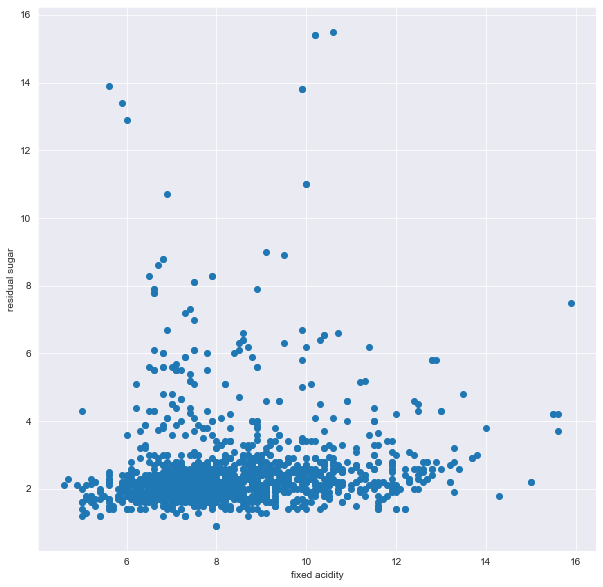

fixed acidity chlorides


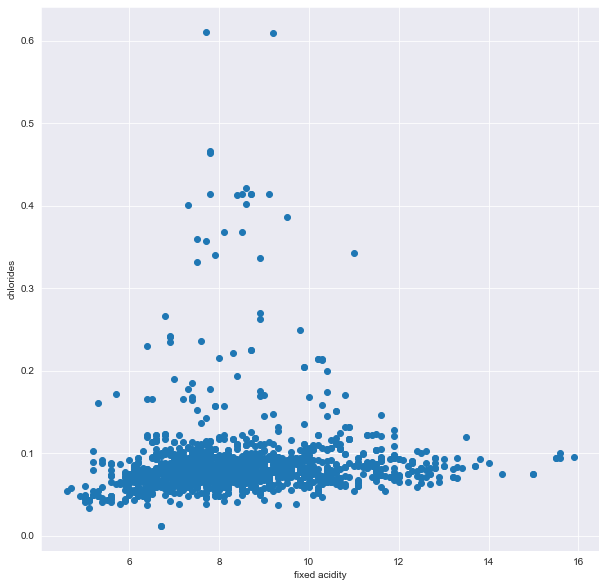

fixed acidity free sulfur dioxide


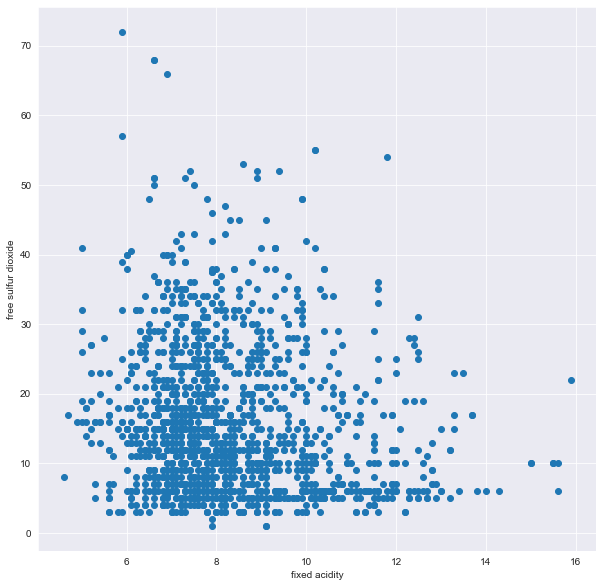

fixed acidity total sulfur dioxide


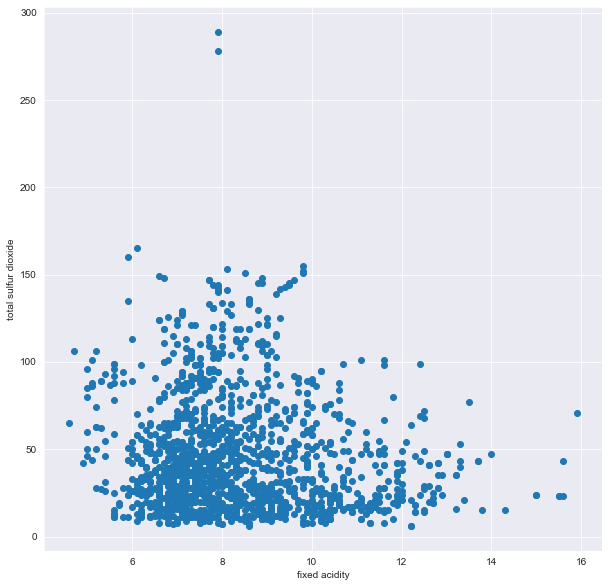

fixed acidity density


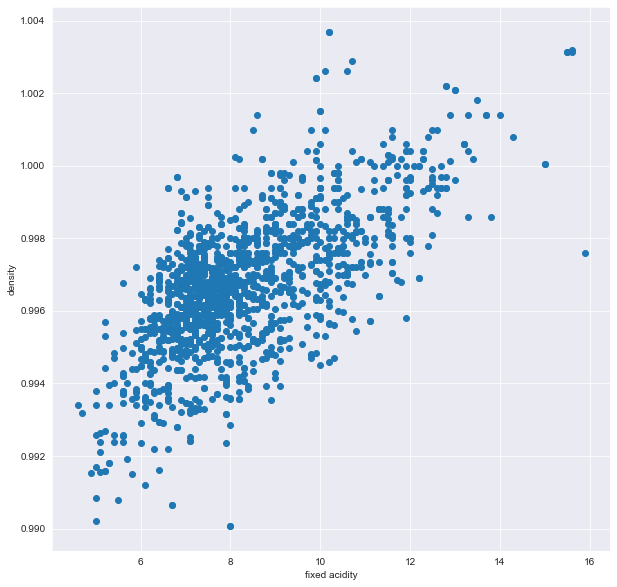

fixed acidity pH


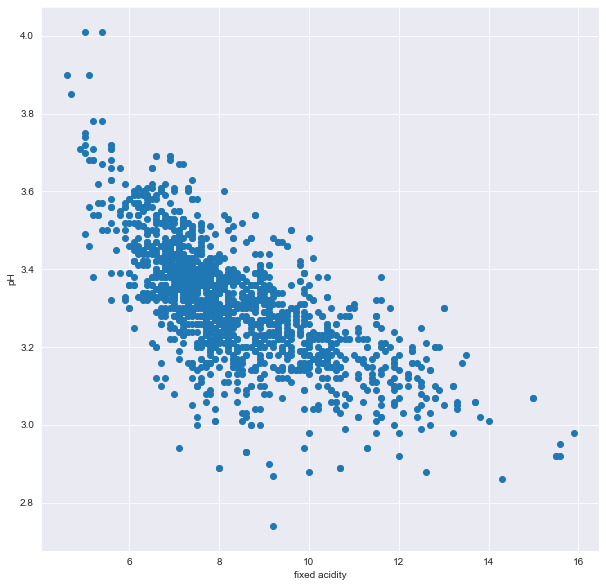

fixed acidity sulphates


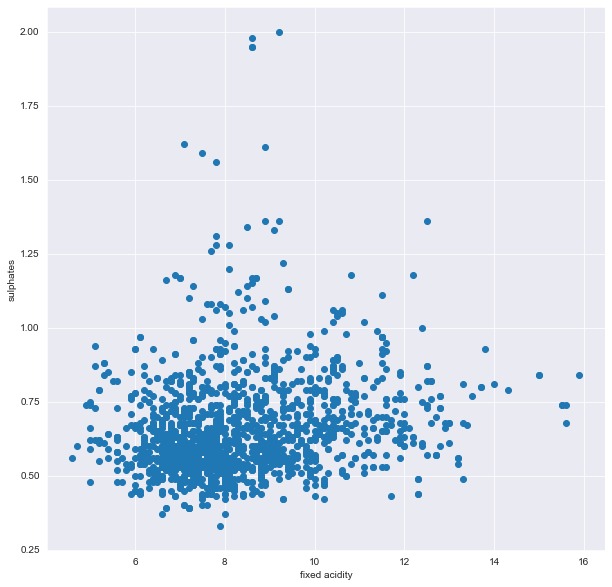

fixed acidity alcohol


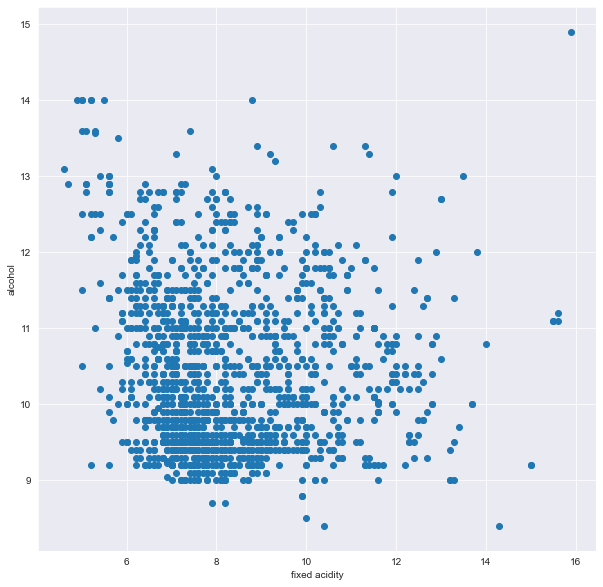

fixed acidity quality


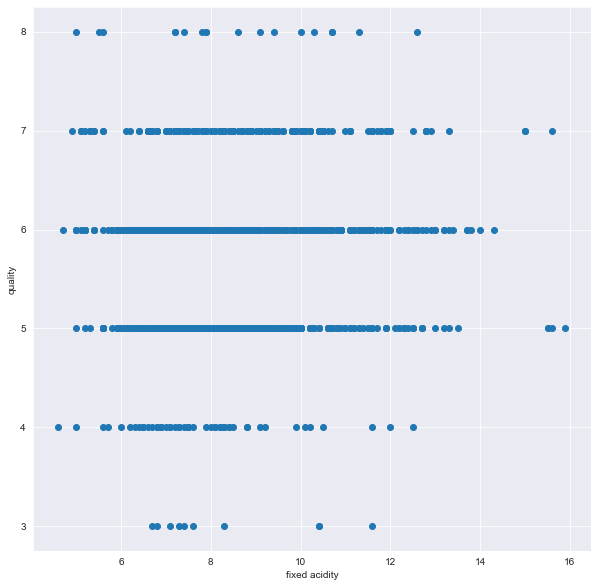

volatile acidity fixed acidity


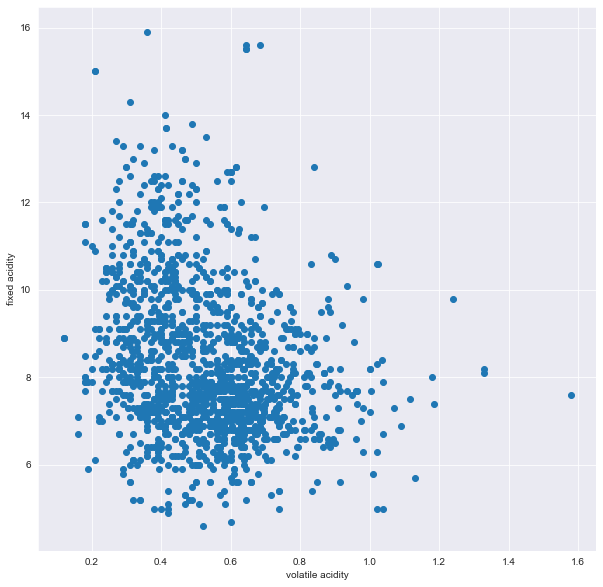

volatile acidity citric acid


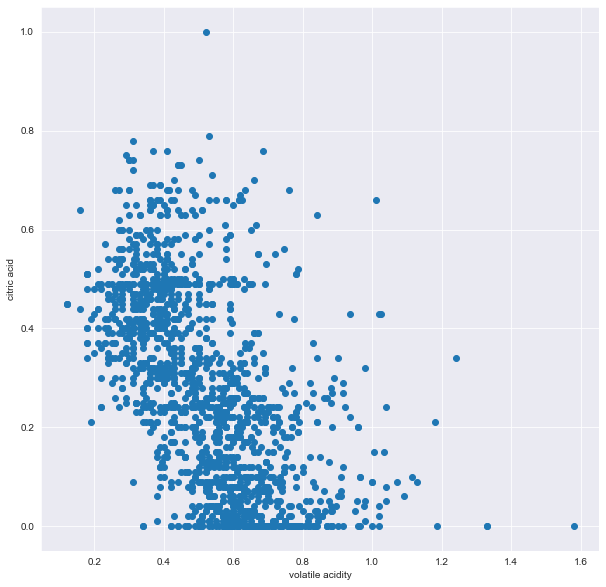

volatile acidity residual sugar


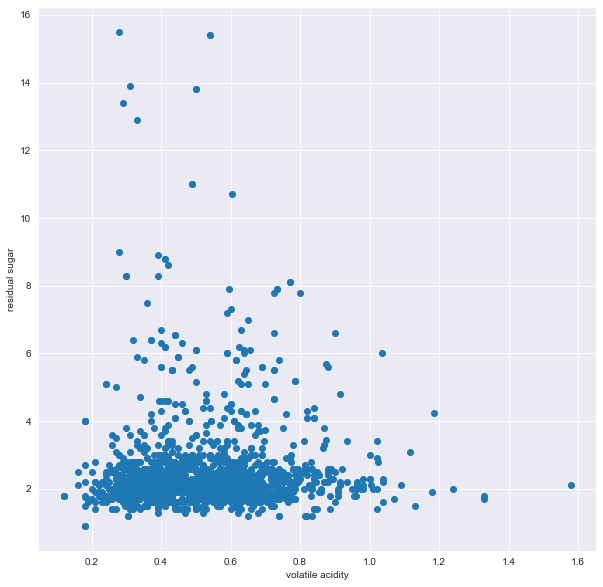

volatile acidity chlorides


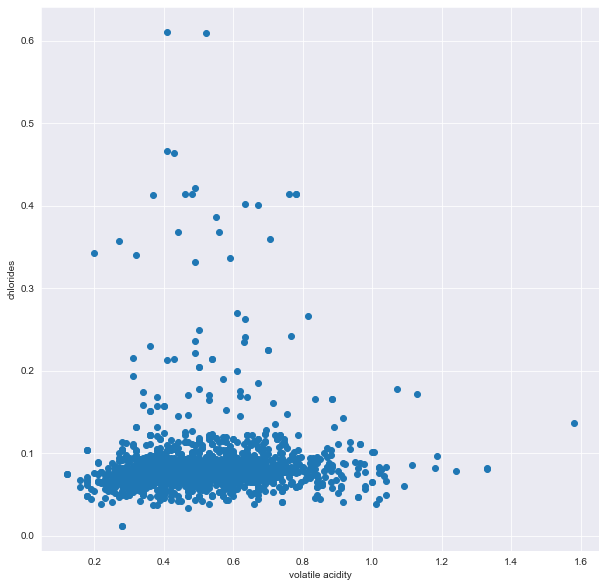

volatile acidity free sulfur dioxide


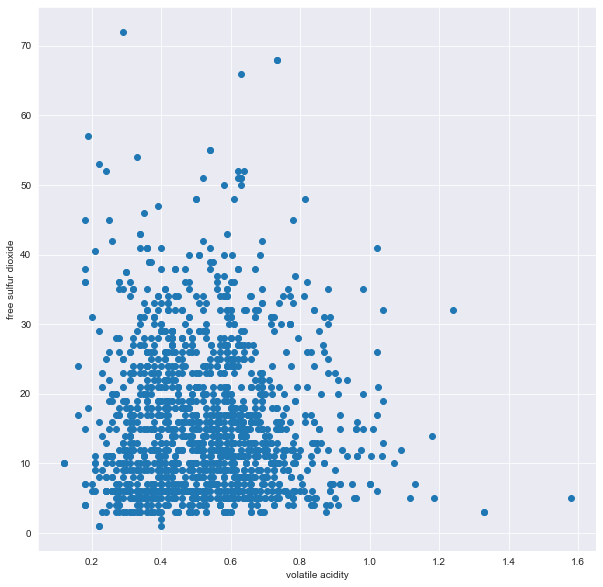

volatile acidity total sulfur dioxide


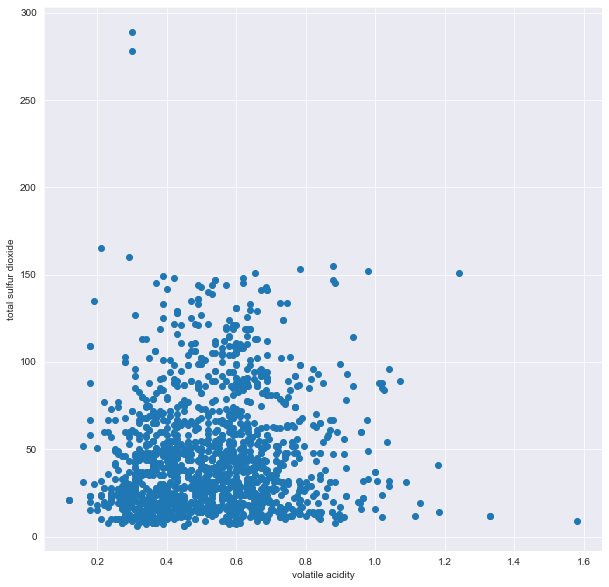

volatile acidity density


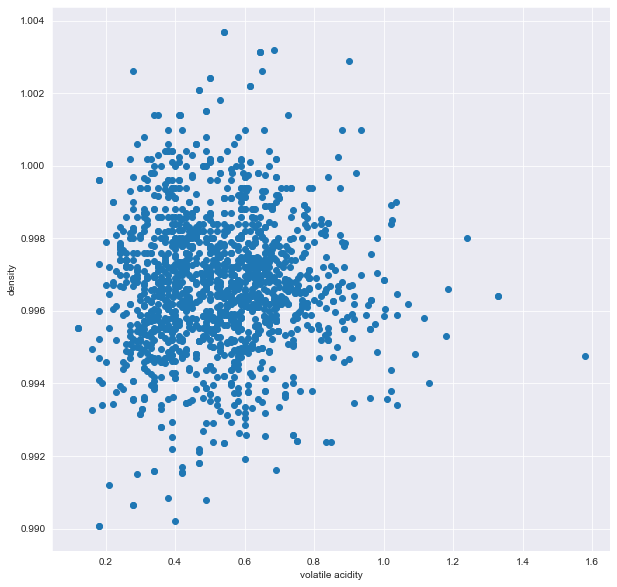

volatile acidity pH


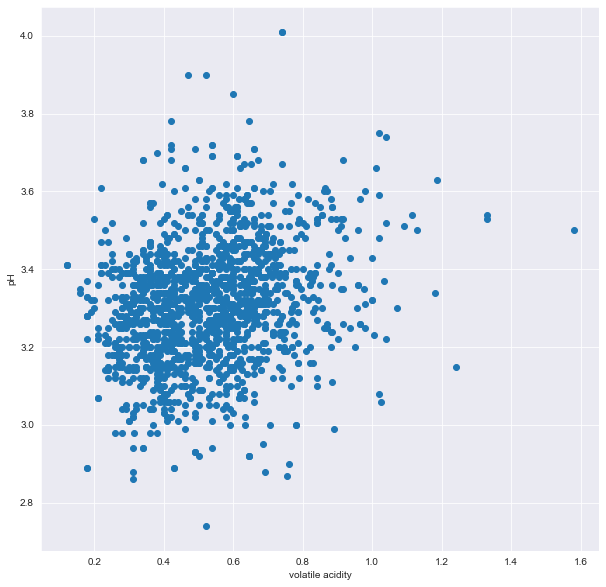

volatile acidity sulphates


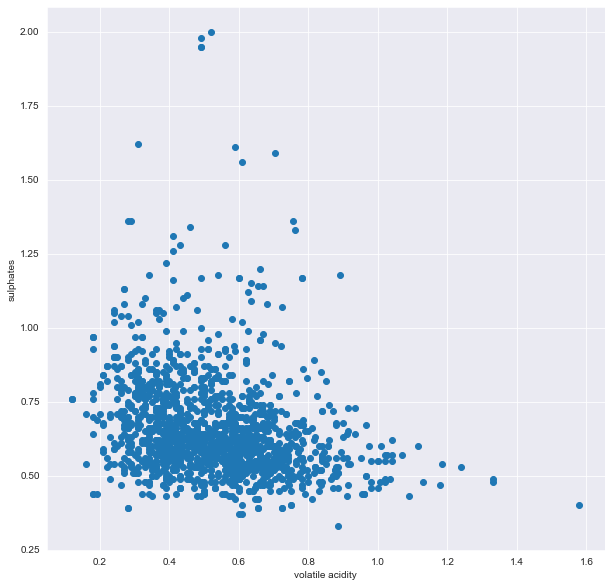

volatile acidity alcohol


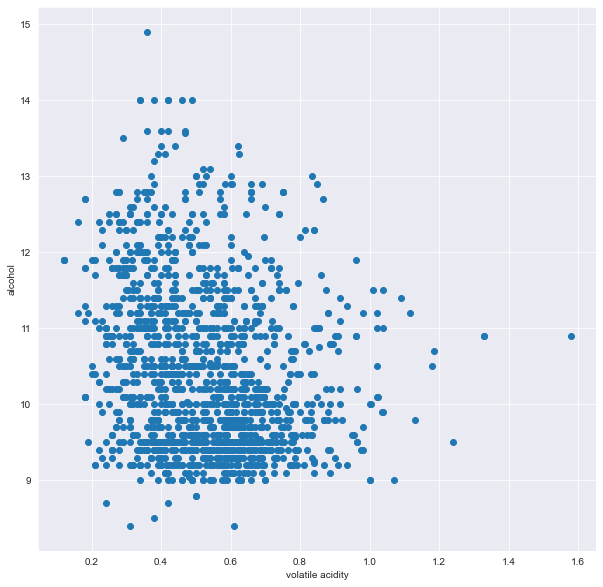

volatile acidity quality


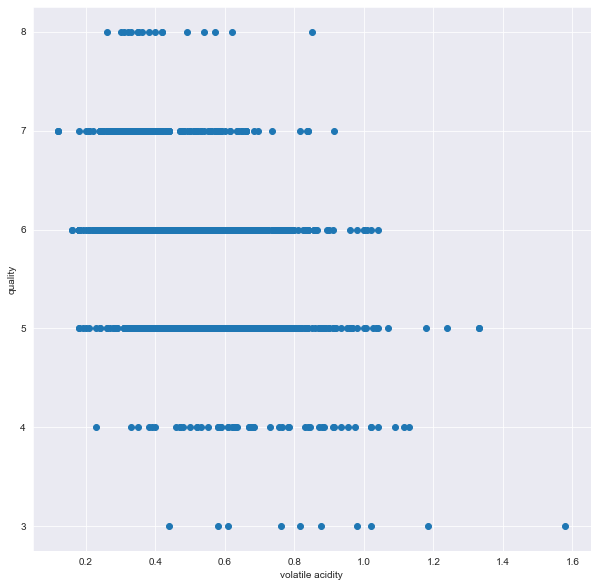

citric acid fixed acidity


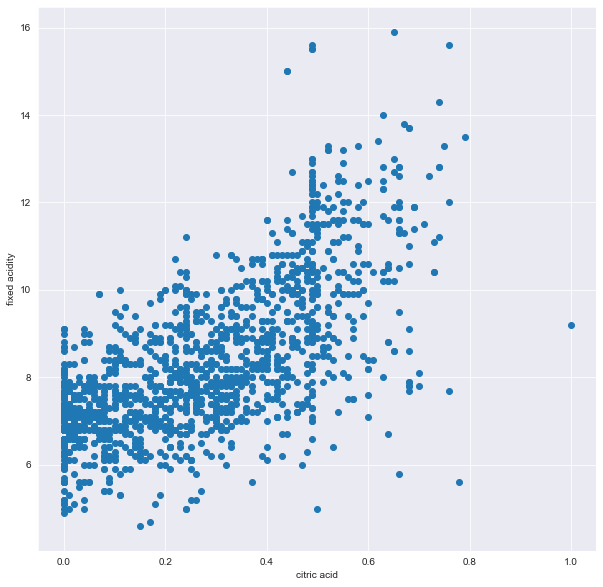

citric acid volatile acidity


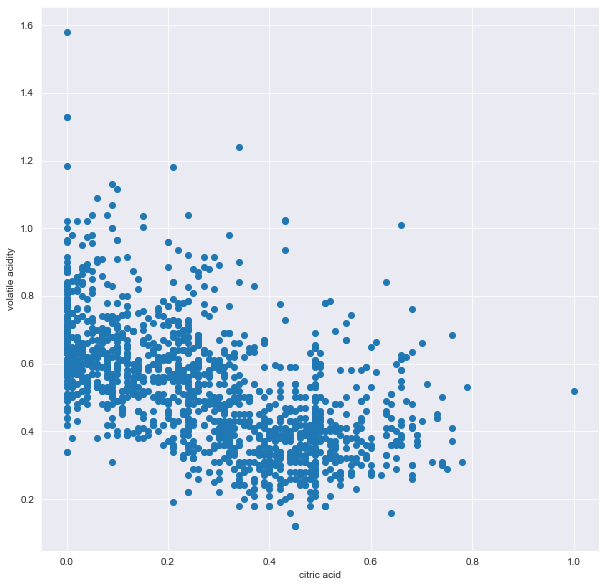

citric acid residual sugar


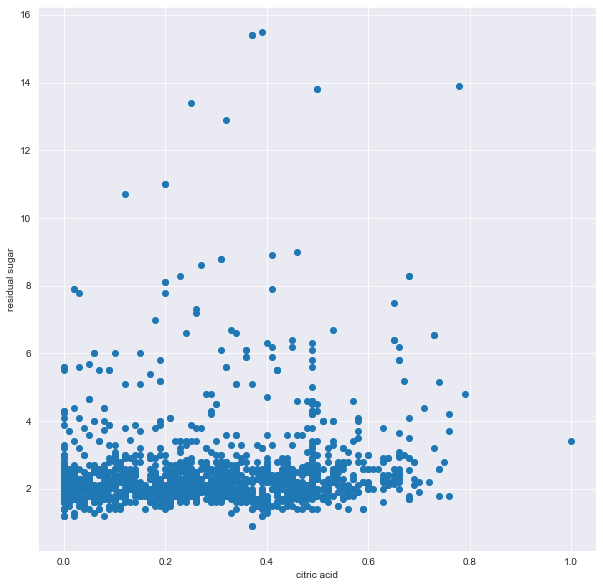

citric acid chlorides


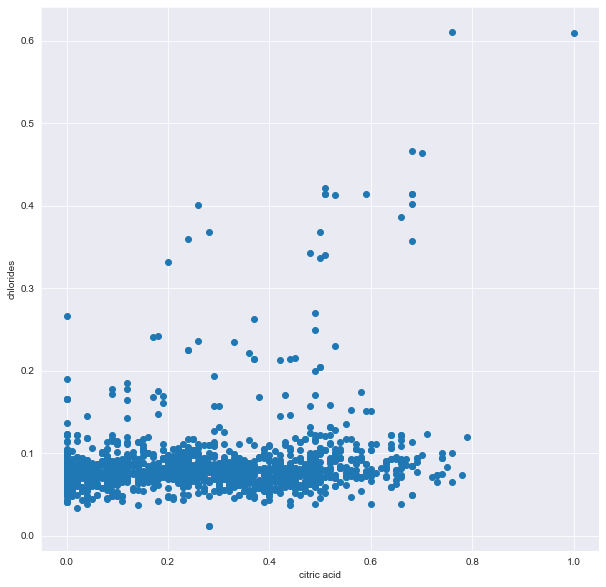

citric acid free sulfur dioxide


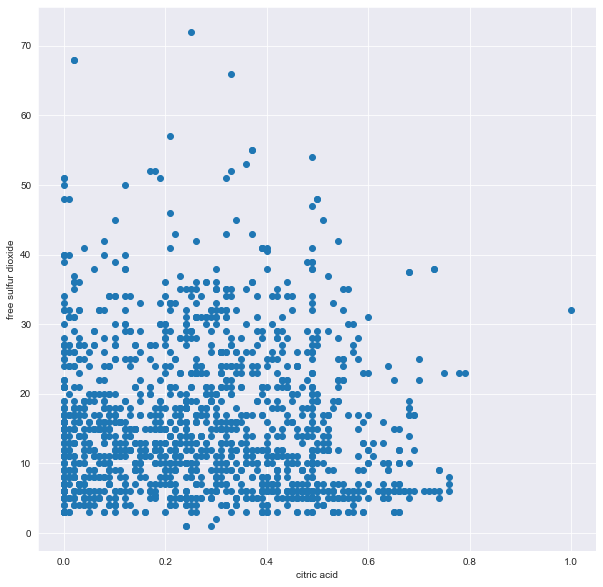

citric acid total sulfur dioxide


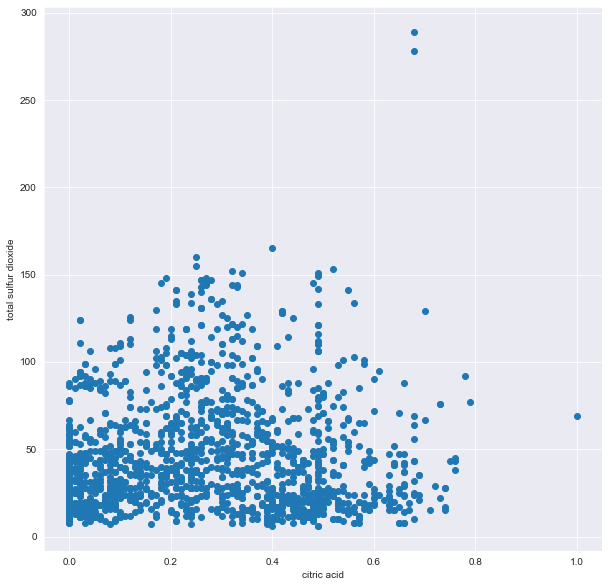

citric acid density


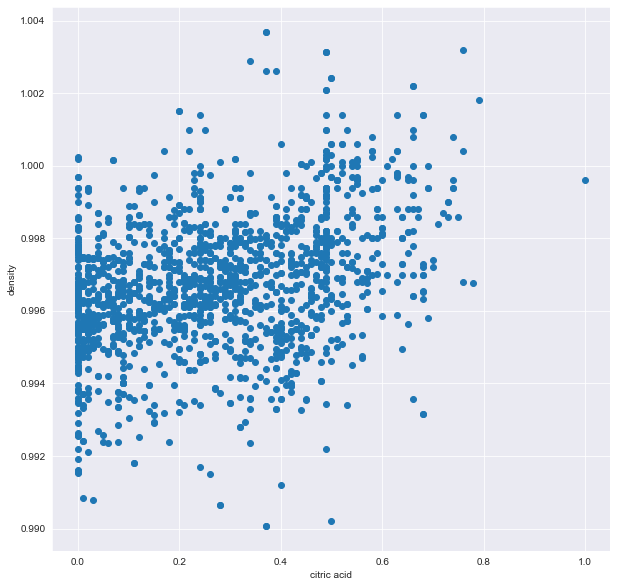

citric acid pH


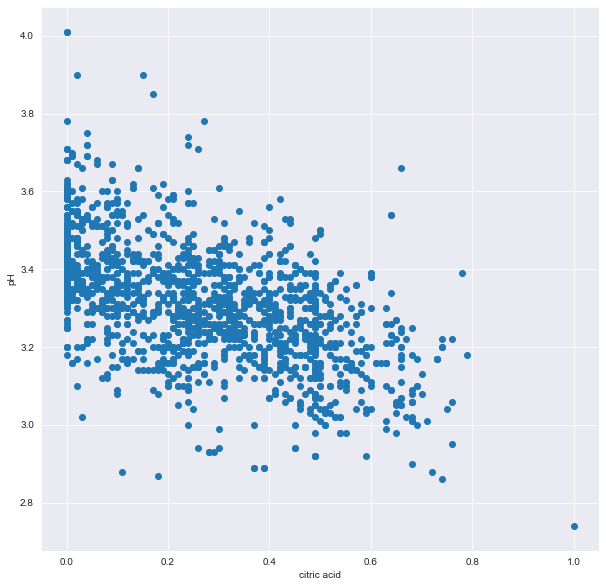

citric acid sulphates


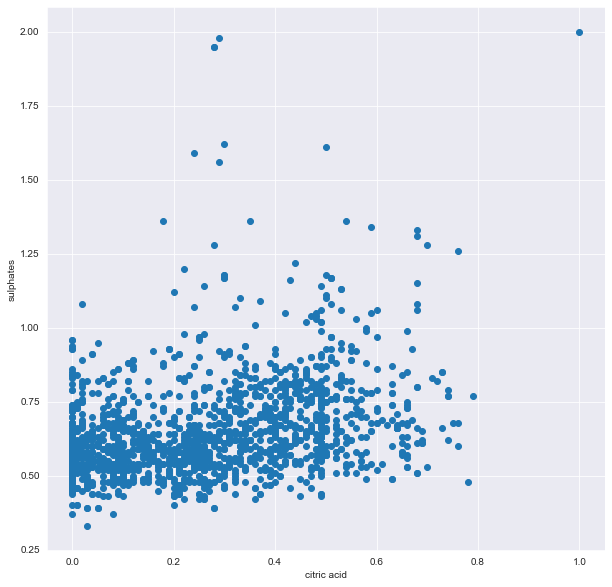

citric acid alcohol


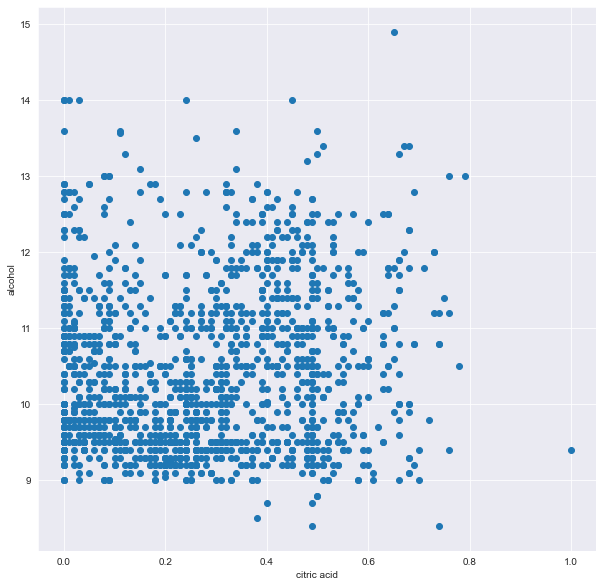

citric acid quality


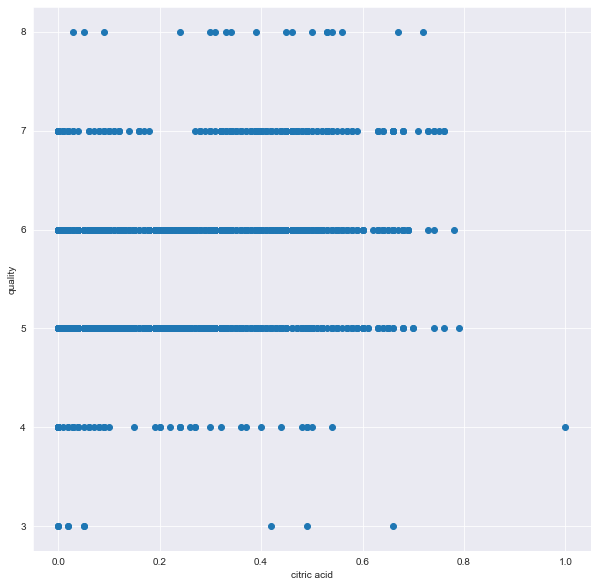

residual sugar fixed acidity


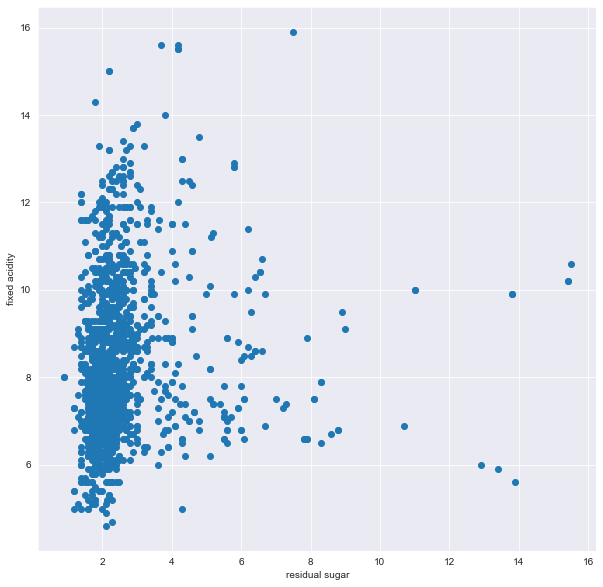

residual sugar volatile acidity


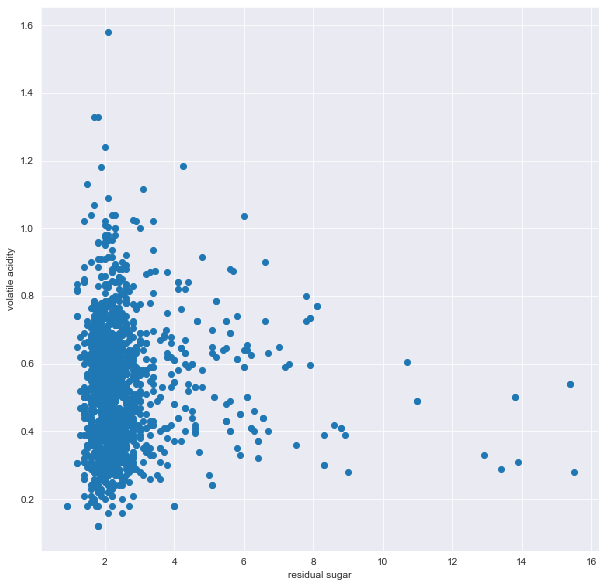

residual sugar citric acid


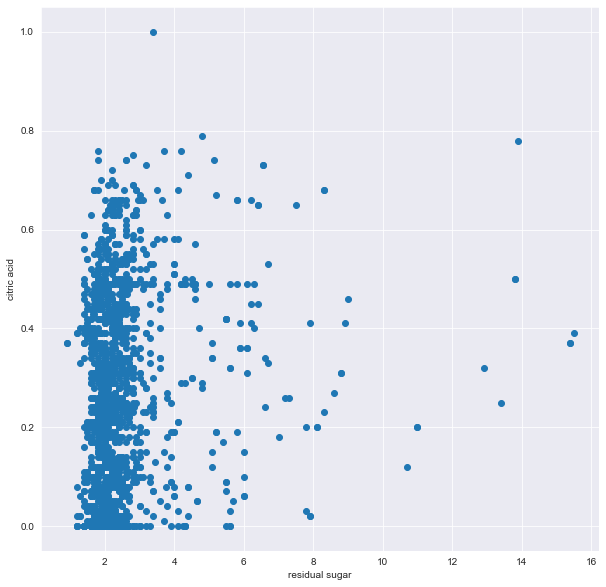

residual sugar chlorides


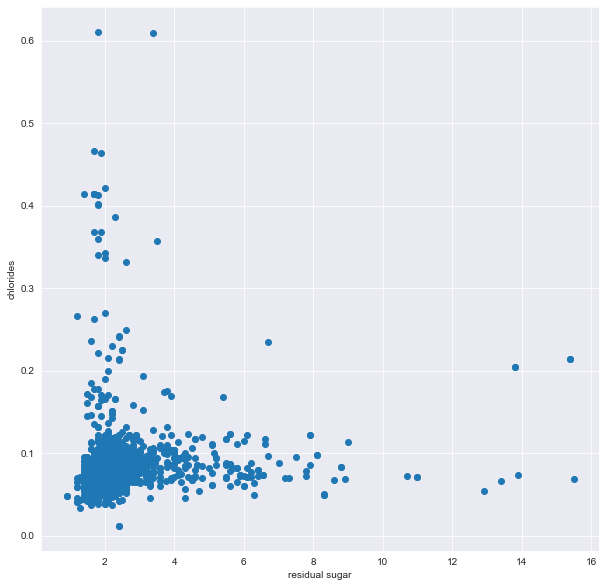

residual sugar free sulfur dioxide


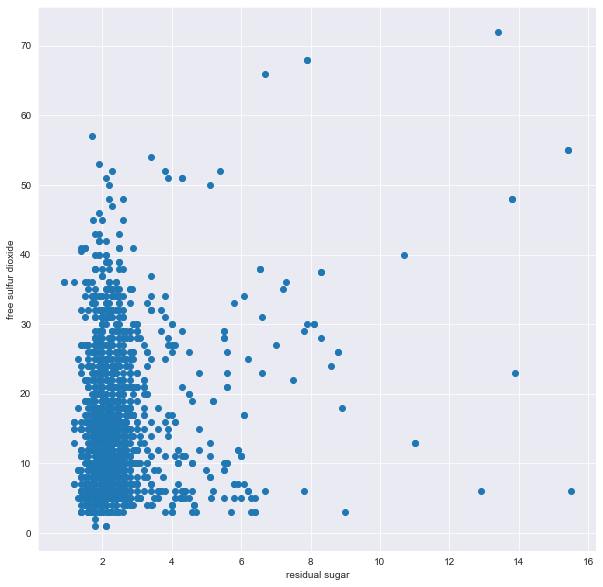

residual sugar total sulfur dioxide


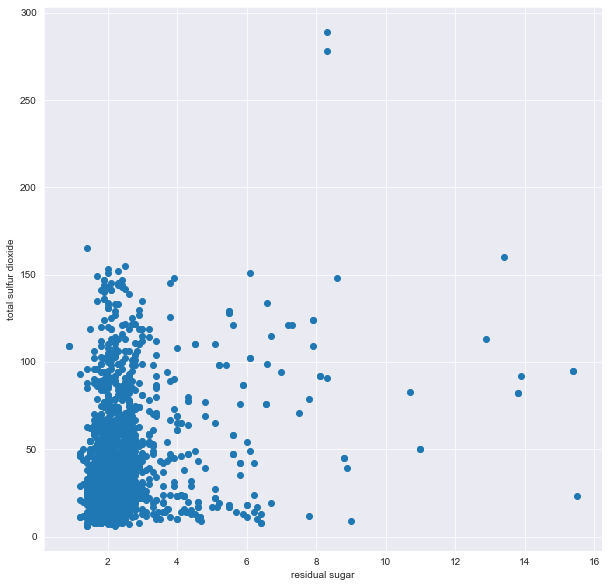

residual sugar density


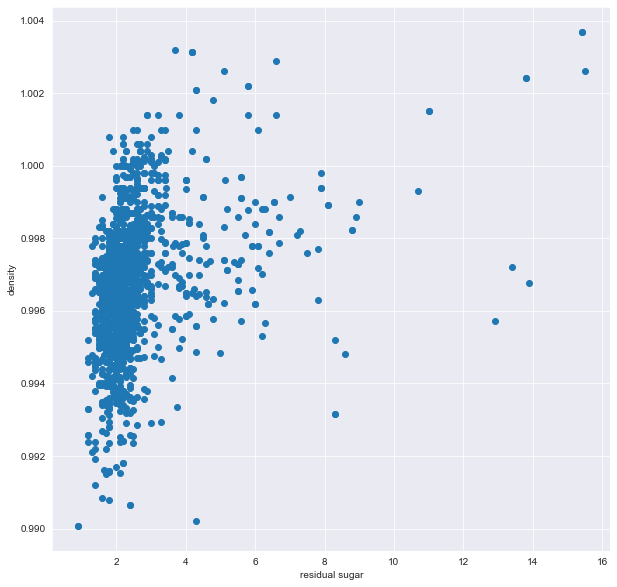

residual sugar pH


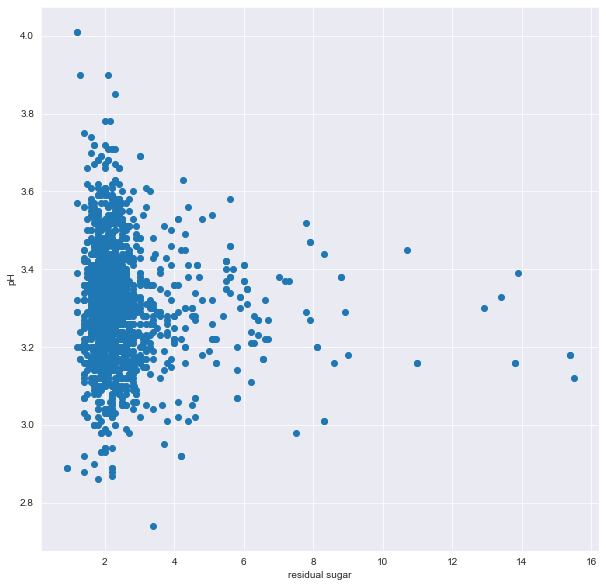

residual sugar sulphates


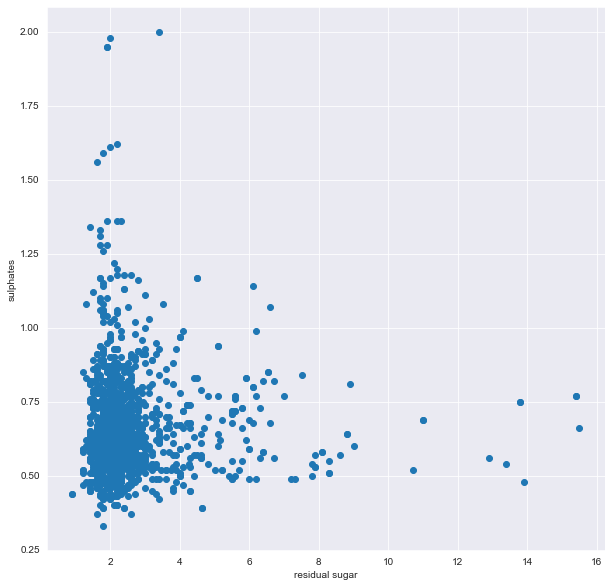

residual sugar alcohol


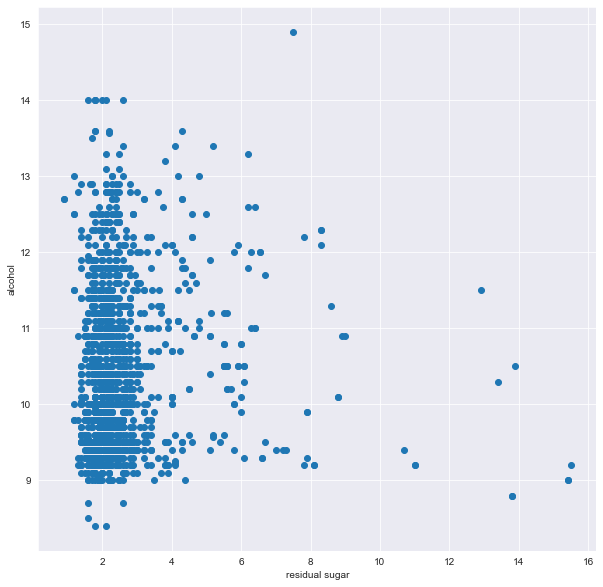

residual sugar quality


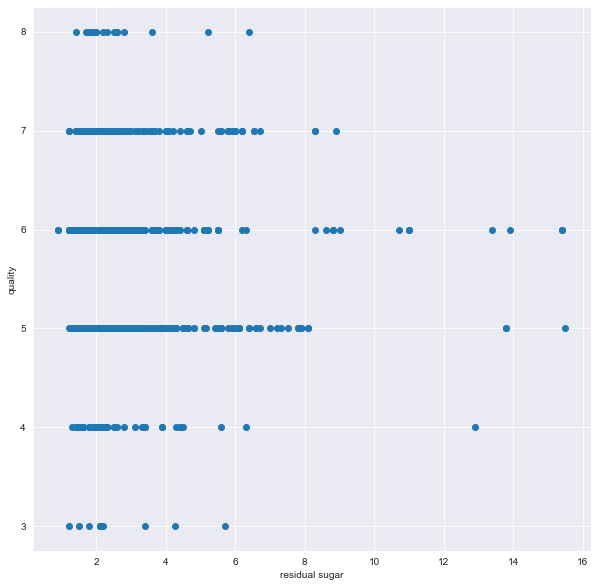

chlorides fixed acidity


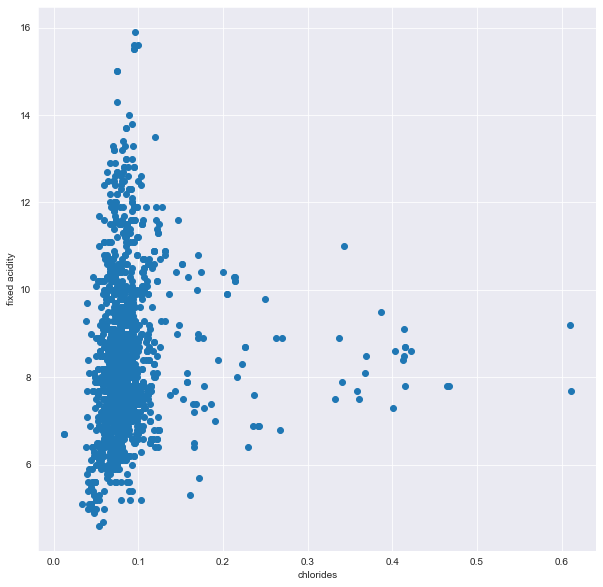

chlorides volatile acidity


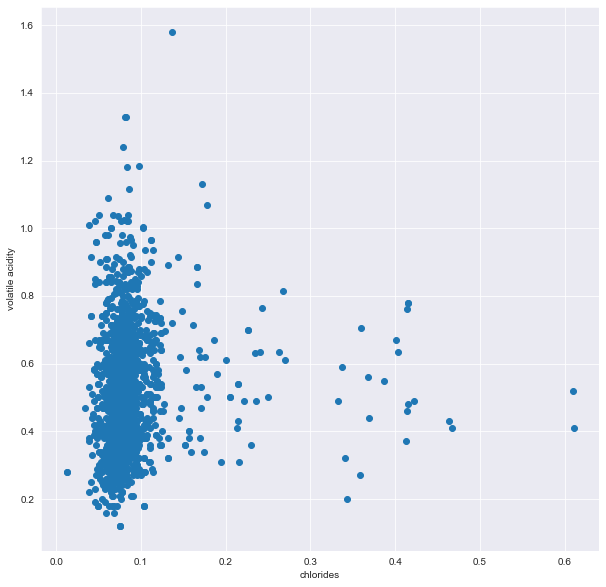

chlorides citric acid


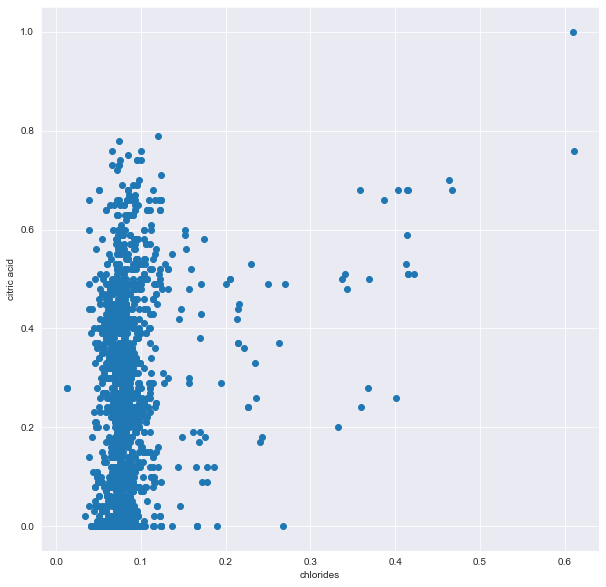

chlorides residual sugar


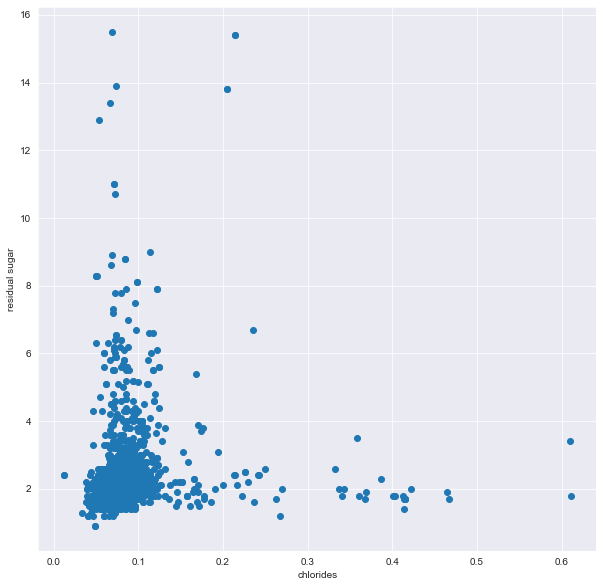

chlorides free sulfur dioxide


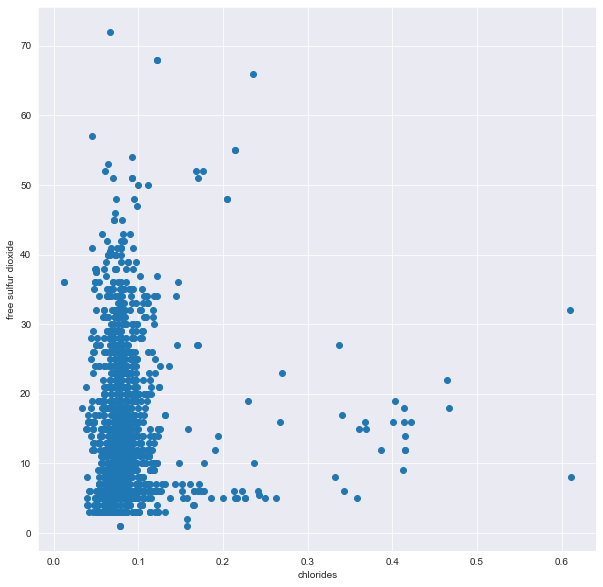

chlorides total sulfur dioxide


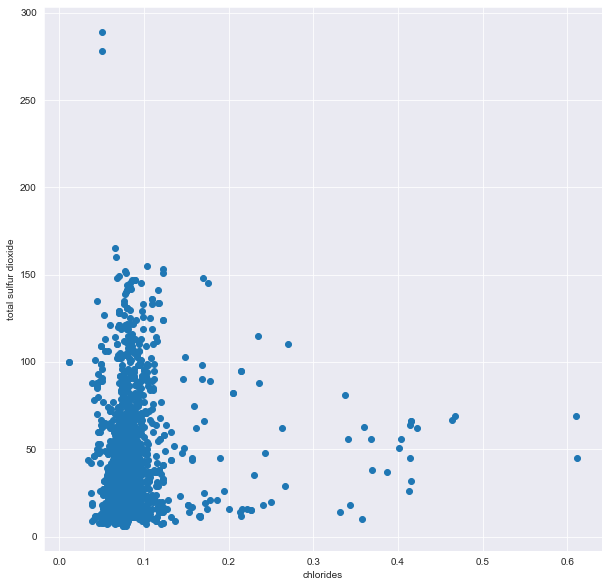

chlorides density


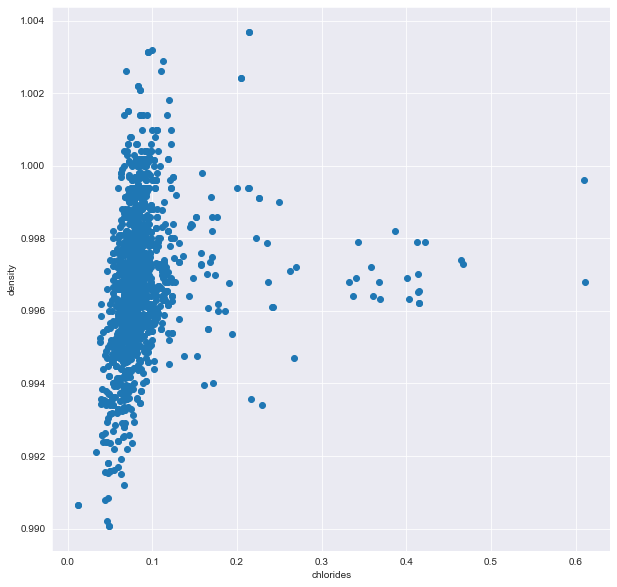

chlorides pH


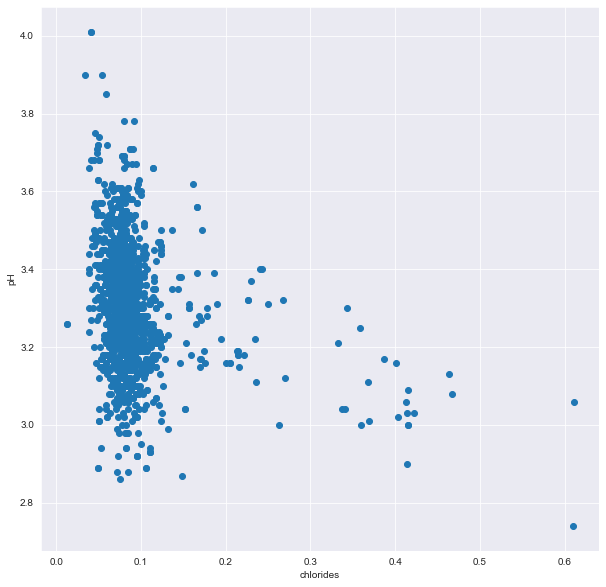

chlorides sulphates


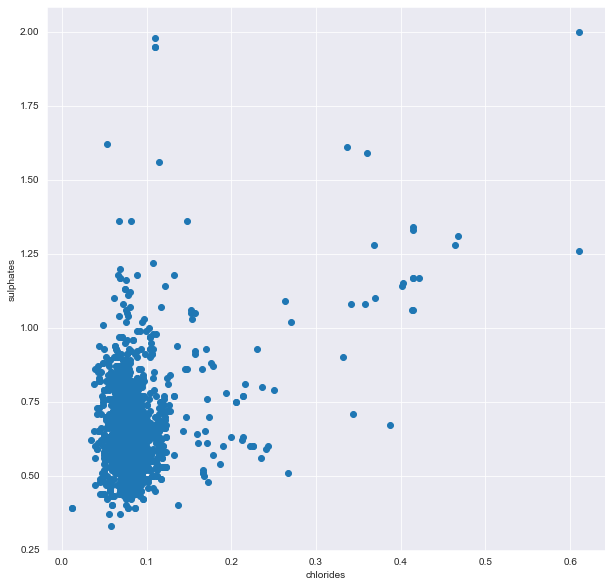

chlorides alcohol


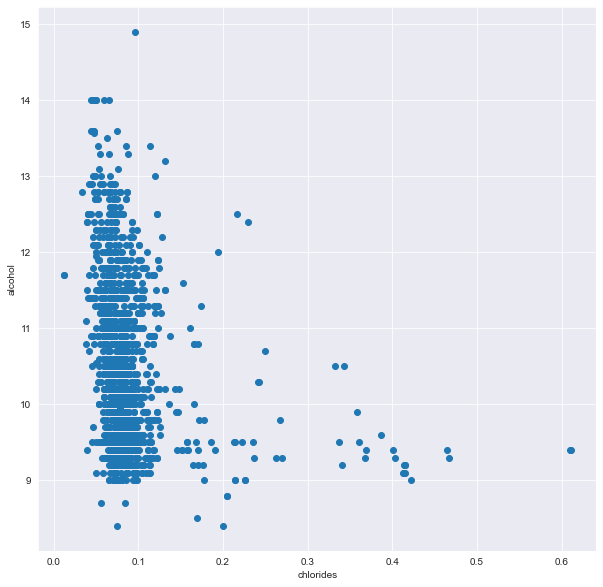

chlorides quality


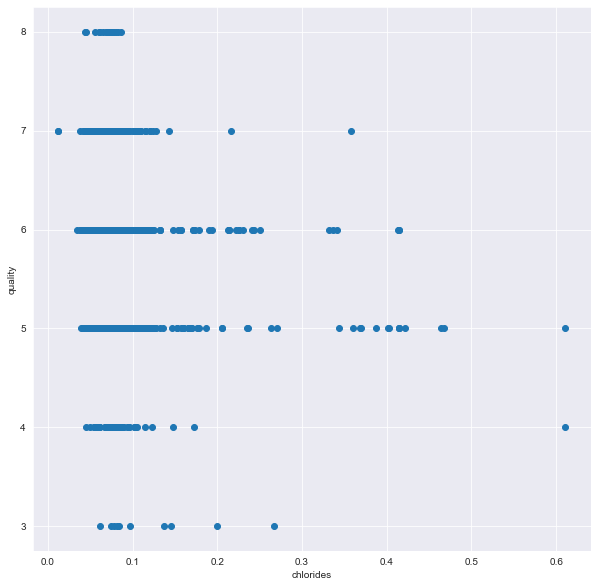

free sulfur dioxide fixed acidity


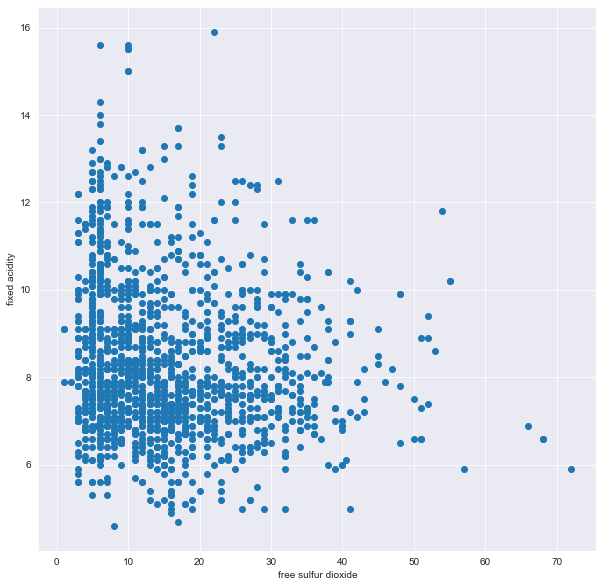

free sulfur dioxide volatile acidity


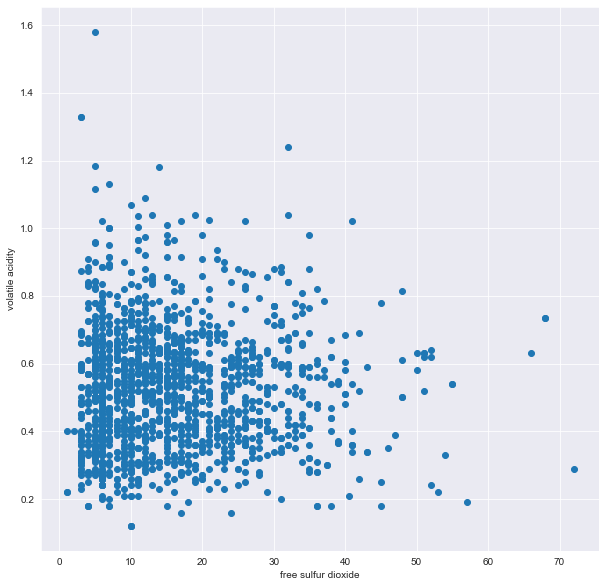

free sulfur dioxide citric acid


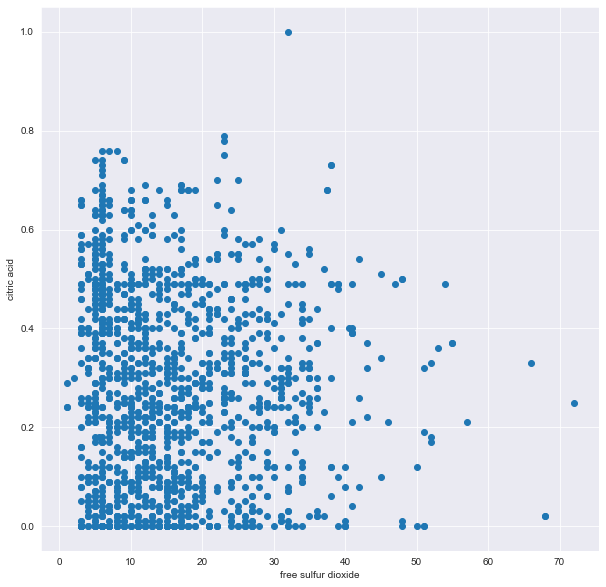

free sulfur dioxide residual sugar


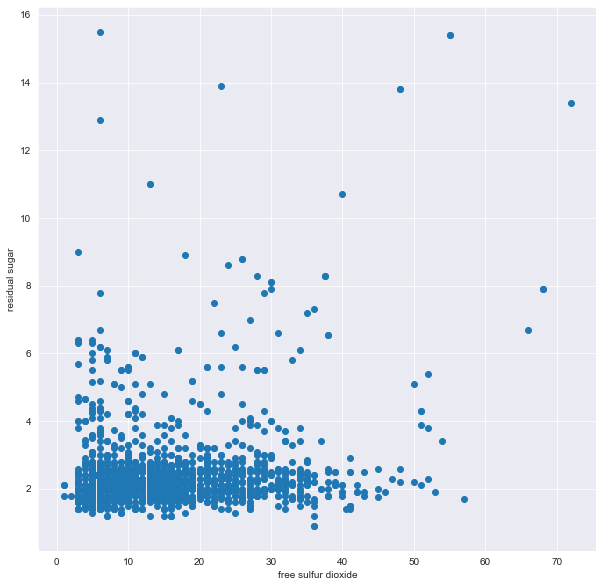

free sulfur dioxide chlorides


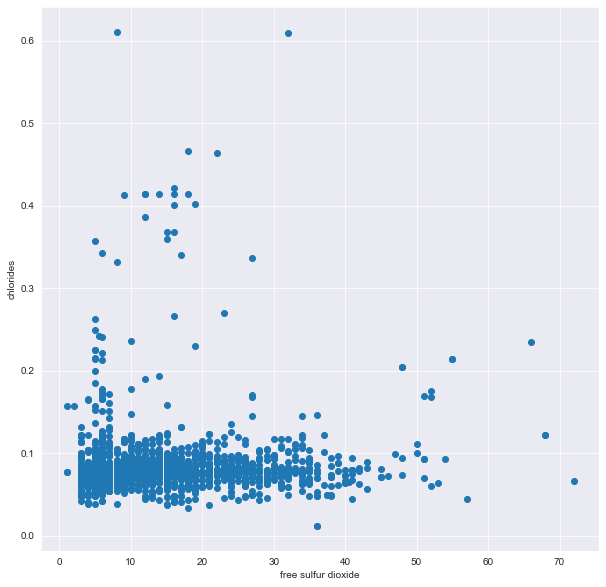

free sulfur dioxide total sulfur dioxide


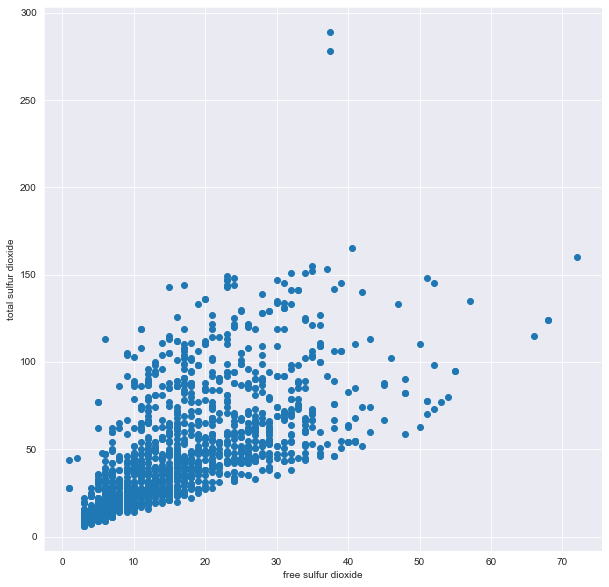

free sulfur dioxide density


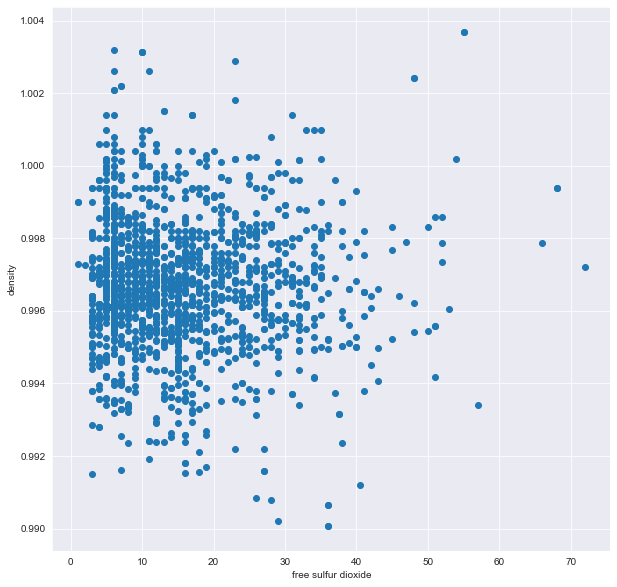

free sulfur dioxide pH


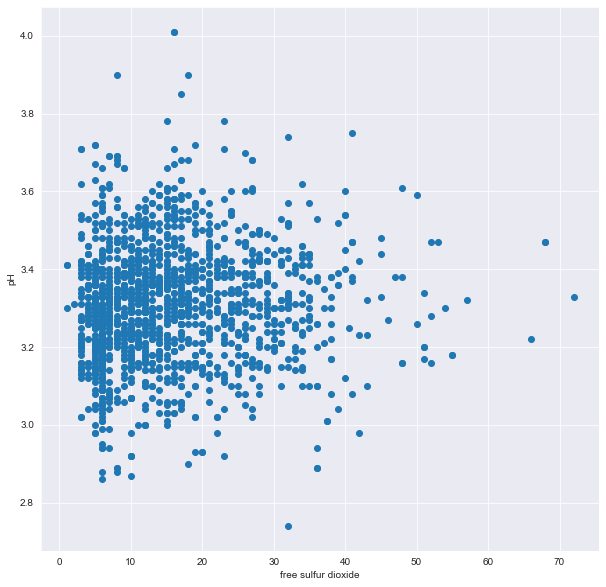

free sulfur dioxide sulphates


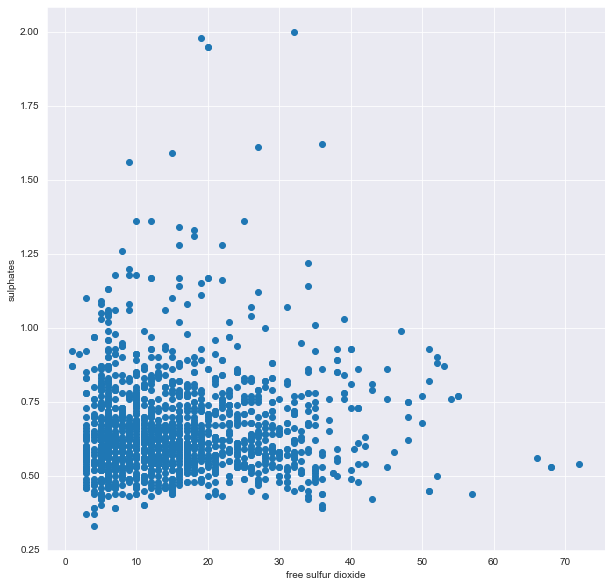

free sulfur dioxide alcohol


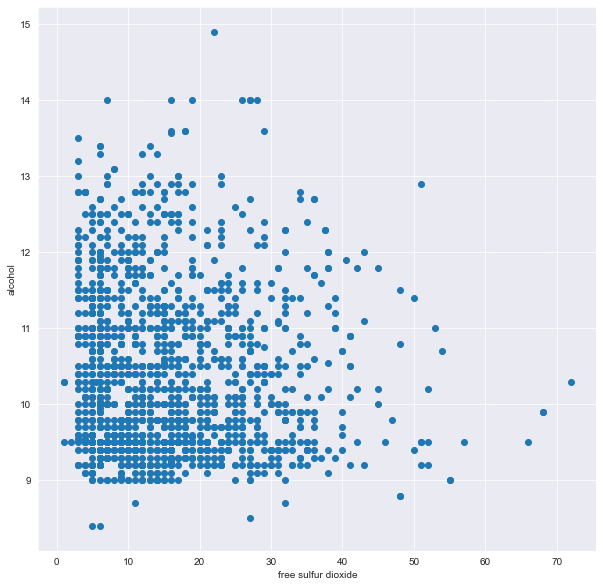

free sulfur dioxide quality


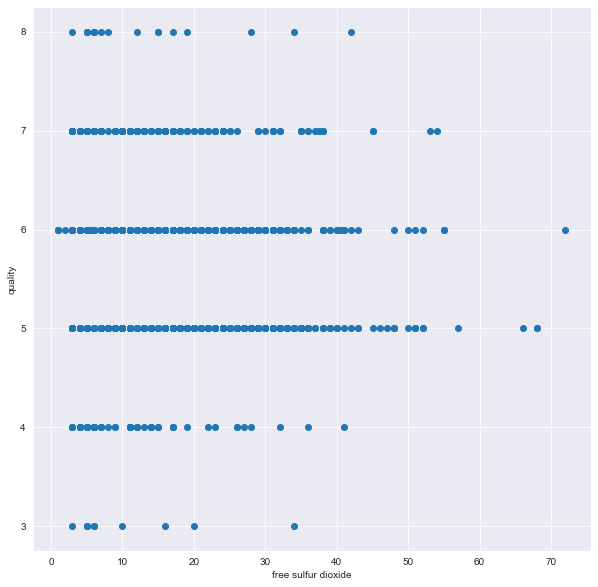

total sulfur dioxide fixed acidity


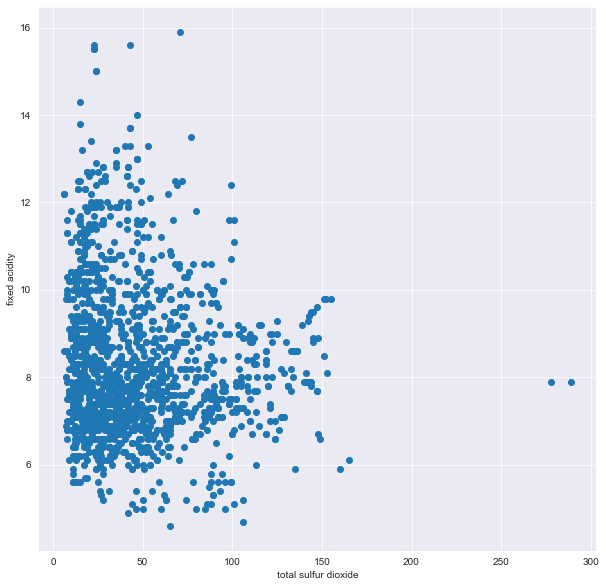

total sulfur dioxide volatile acidity


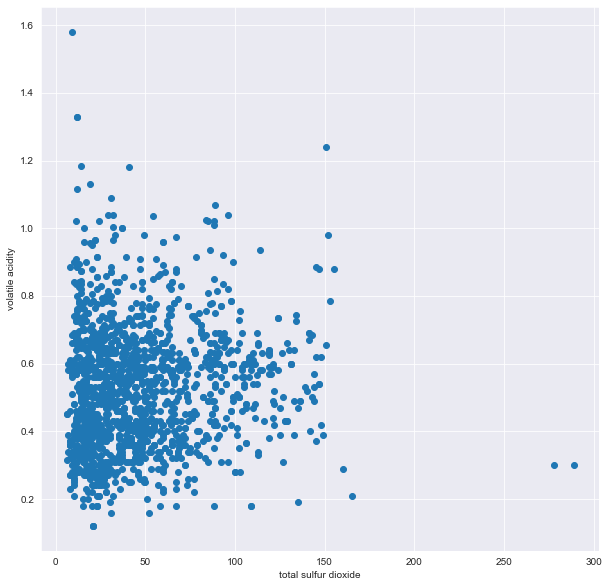

total sulfur dioxide citric acid


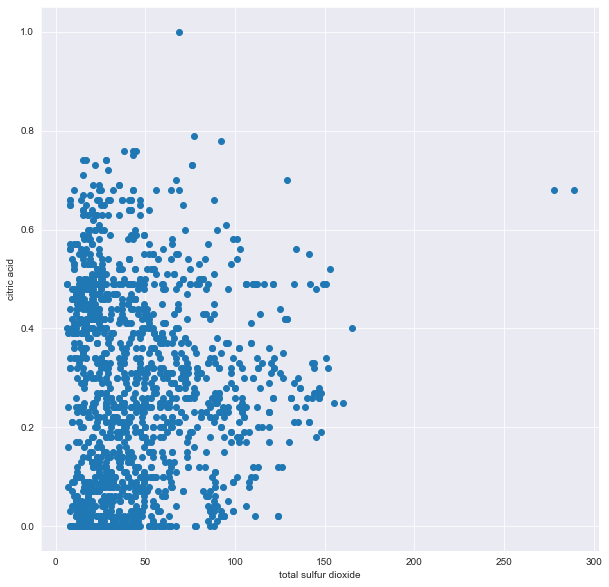

total sulfur dioxide residual sugar


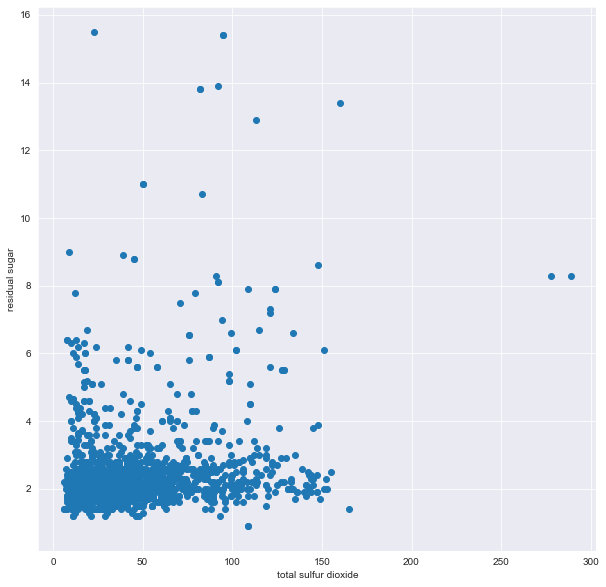

total sulfur dioxide chlorides


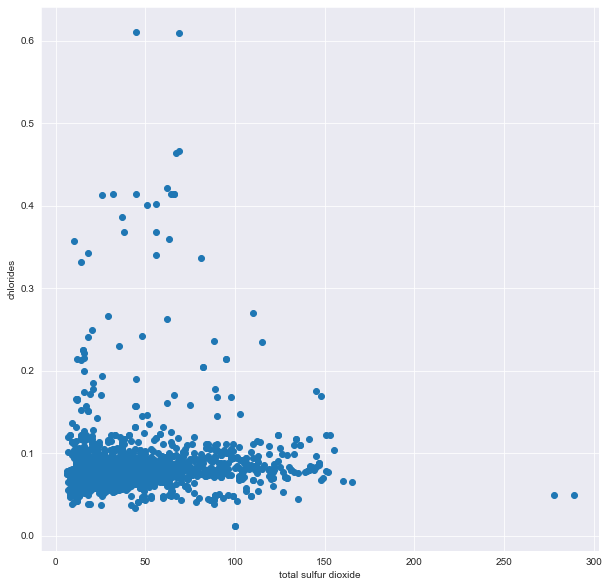

total sulfur dioxide free sulfur dioxide


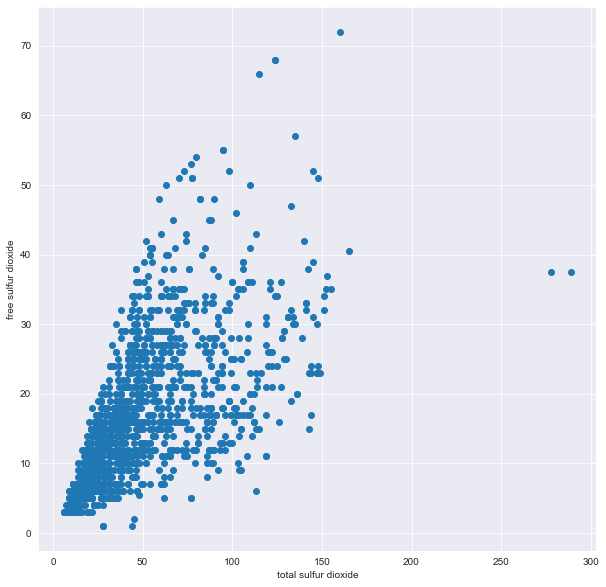

total sulfur dioxide density


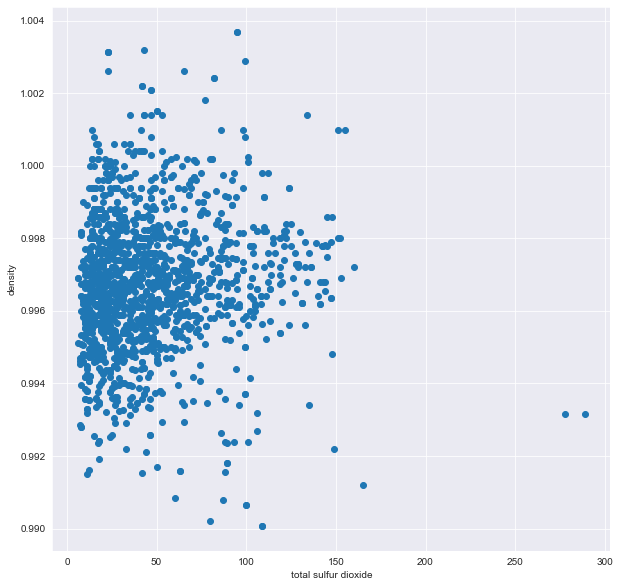

total sulfur dioxide pH


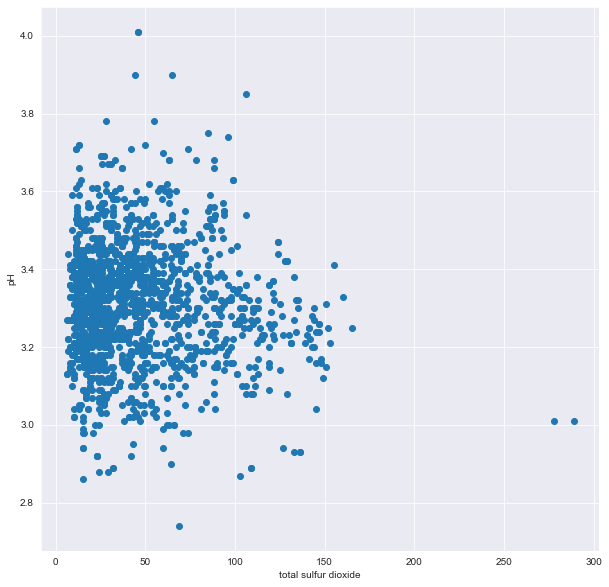

total sulfur dioxide sulphates


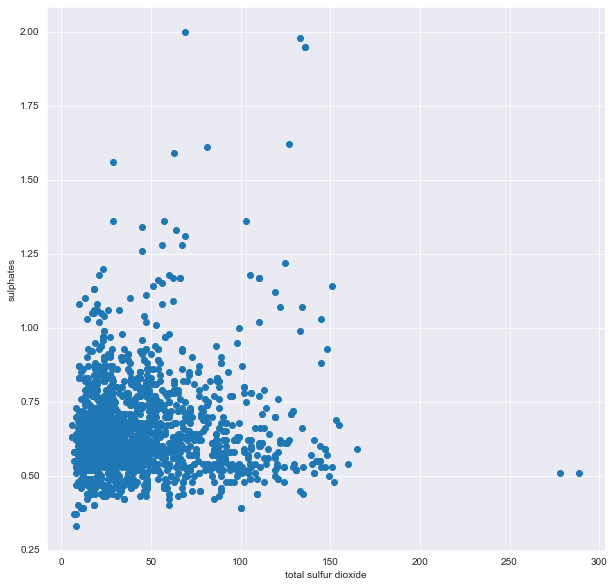

total sulfur dioxide alcohol


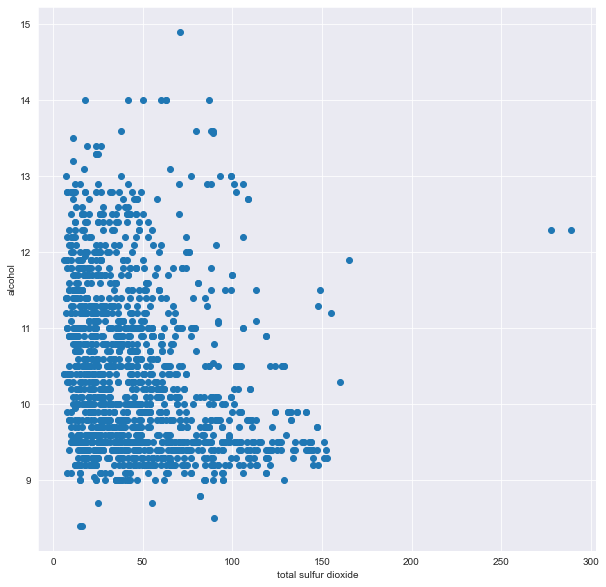

total sulfur dioxide quality


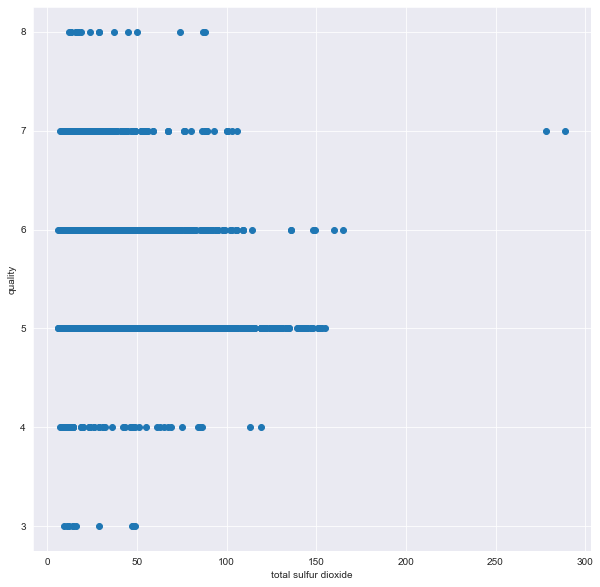

density fixed acidity


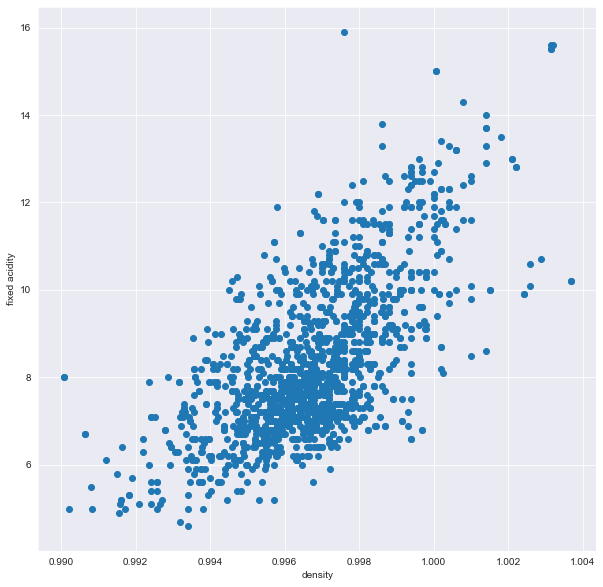

density volatile acidity


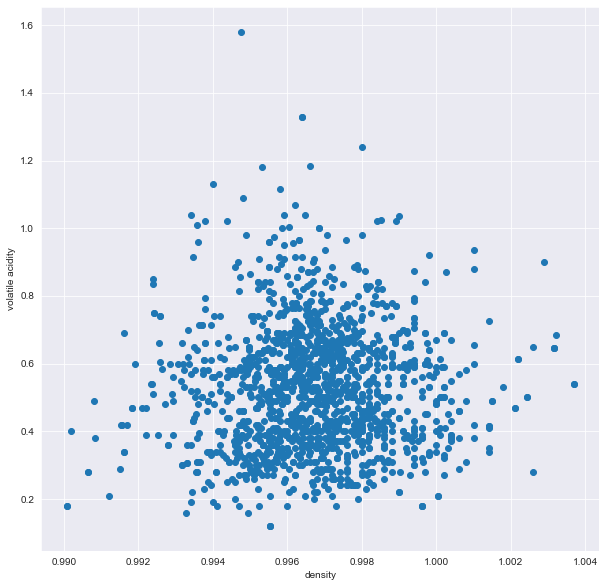

density citric acid


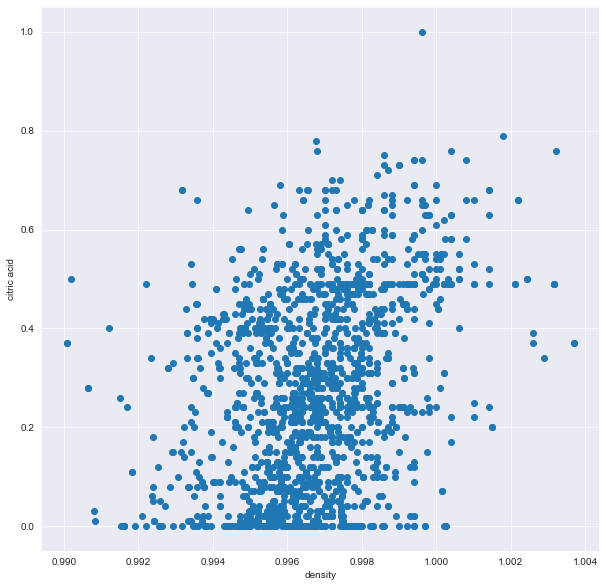

density residual sugar


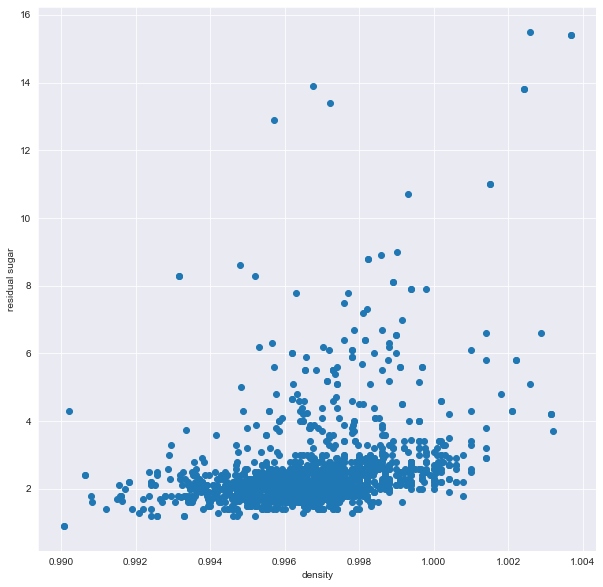

density chlorides


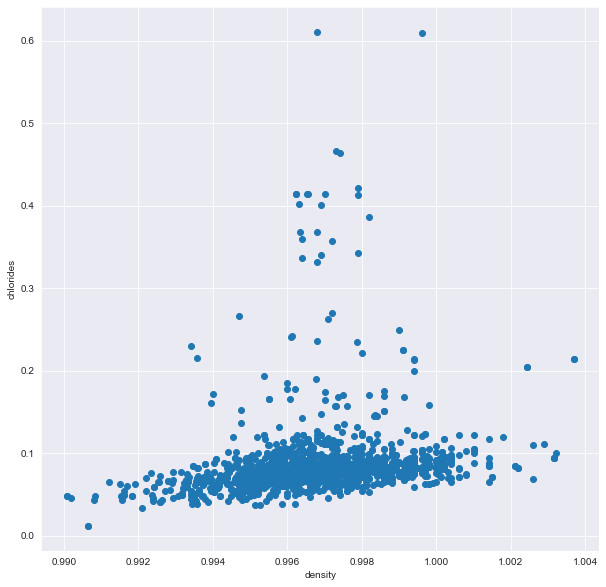

density free sulfur dioxide


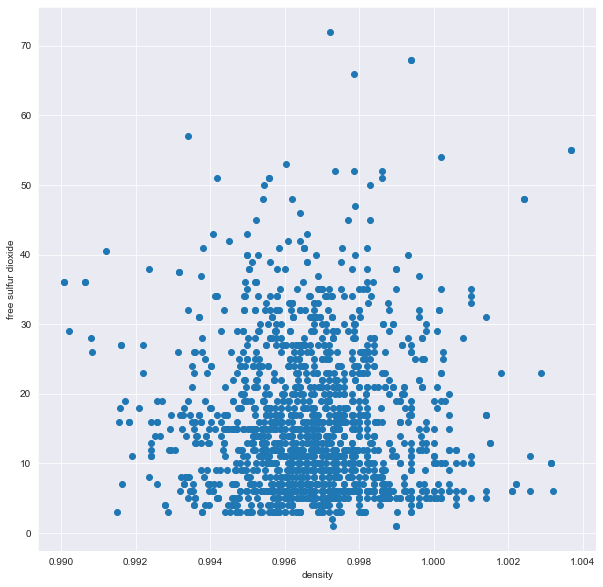

density total sulfur dioxide


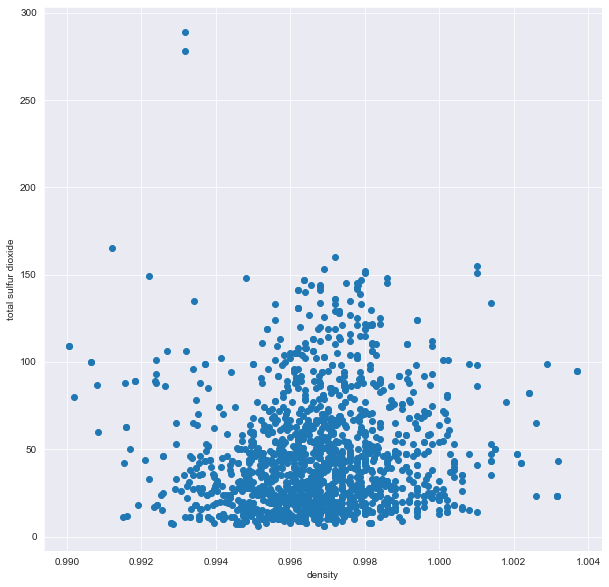

density pH


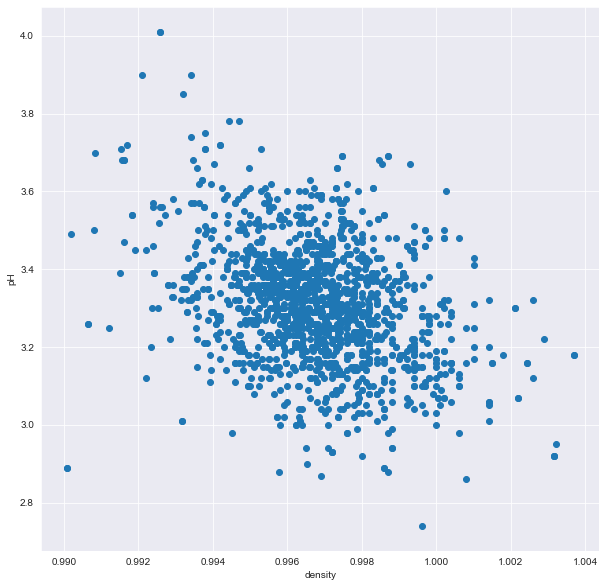

density sulphates


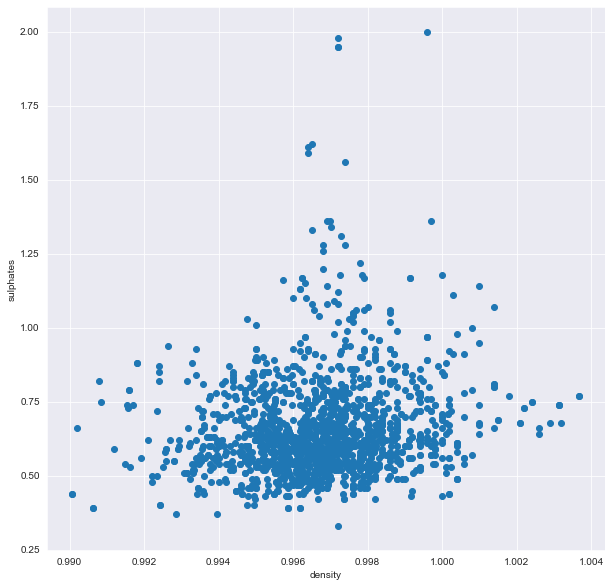

density alcohol


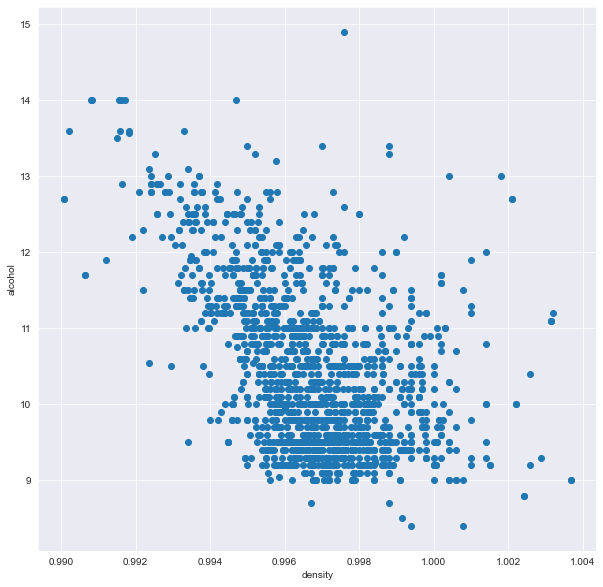

density quality


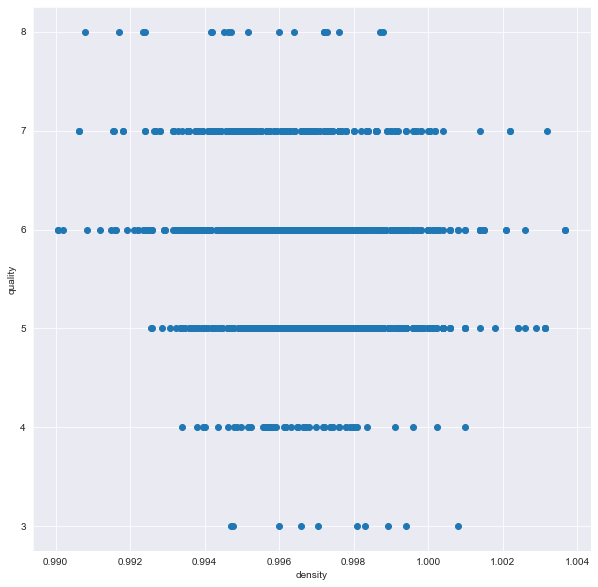

pH fixed acidity


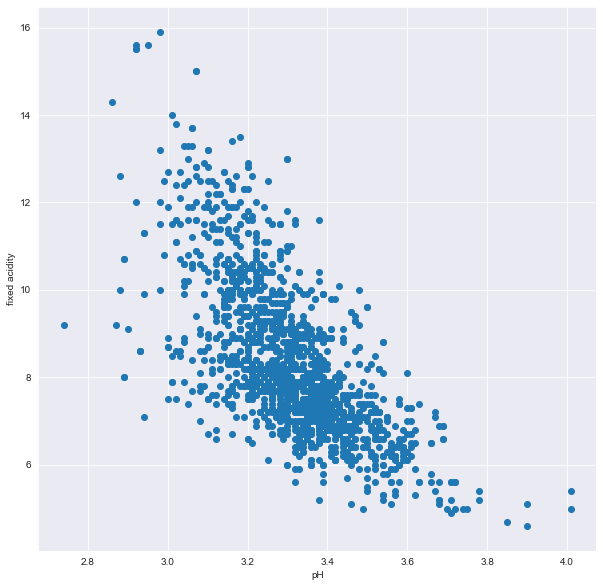

pH volatile acidity


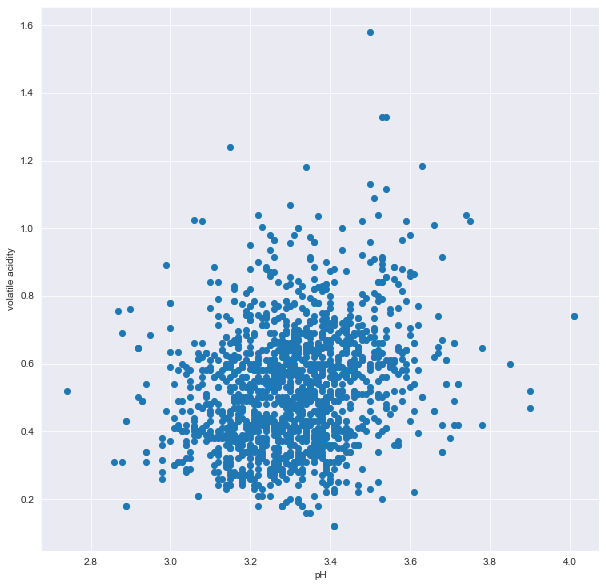

pH citric acid


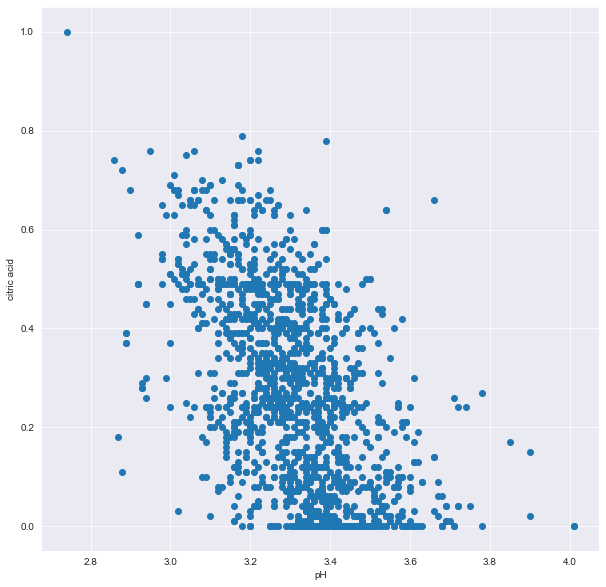

pH residual sugar


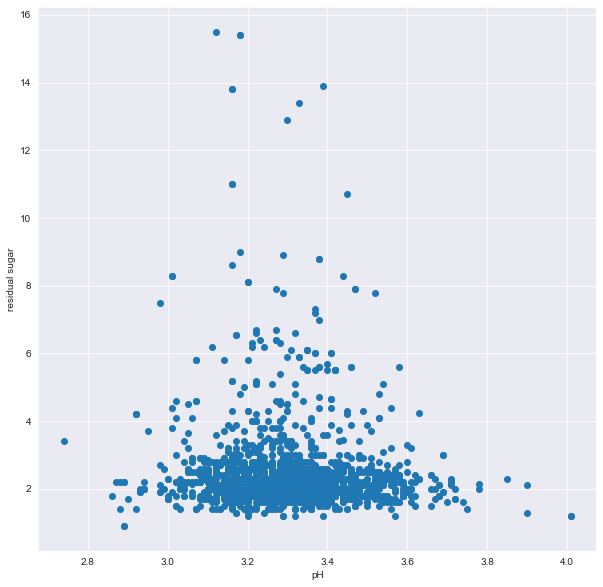

pH chlorides


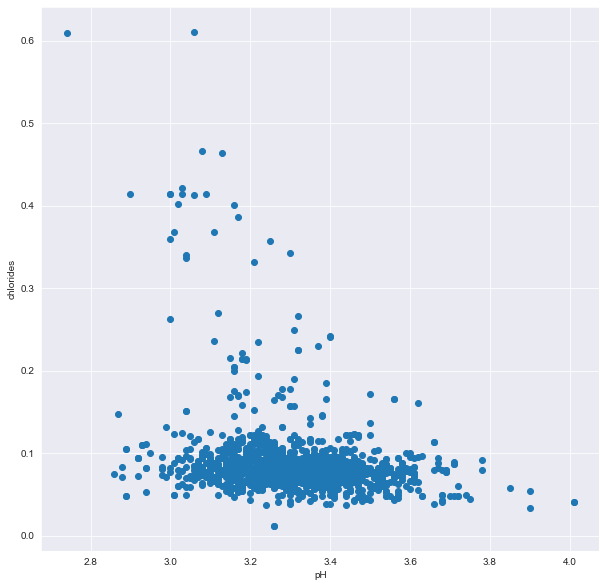

pH free sulfur dioxide


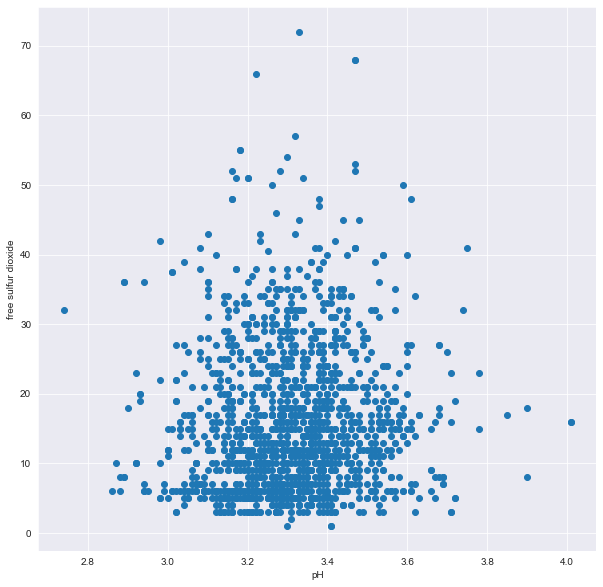

pH total sulfur dioxide


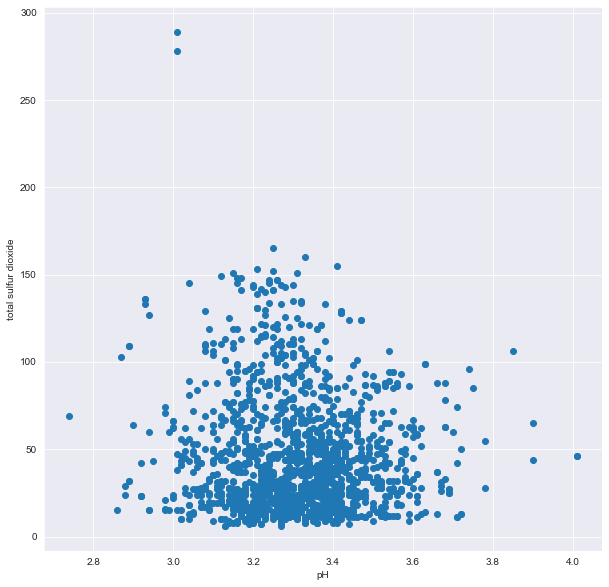

pH density


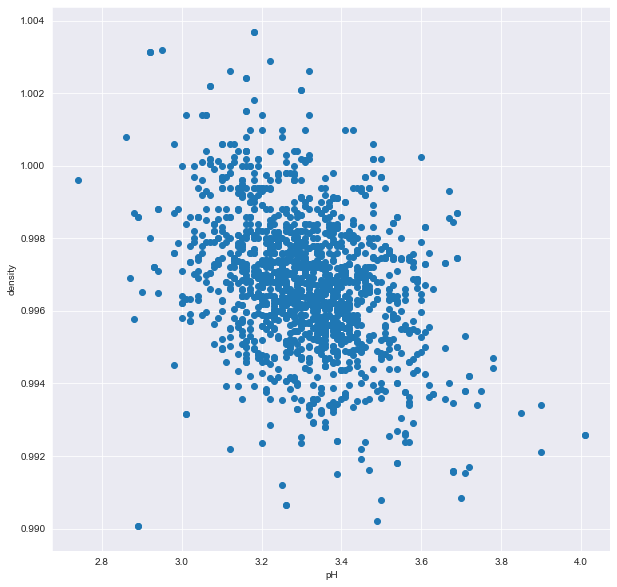

pH sulphates


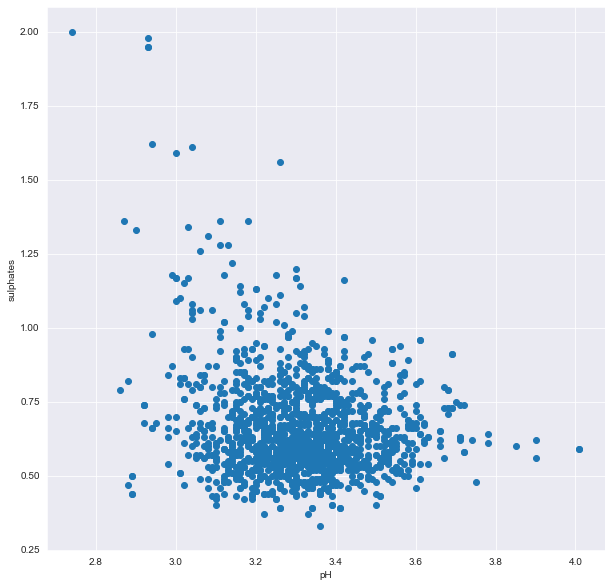

pH alcohol


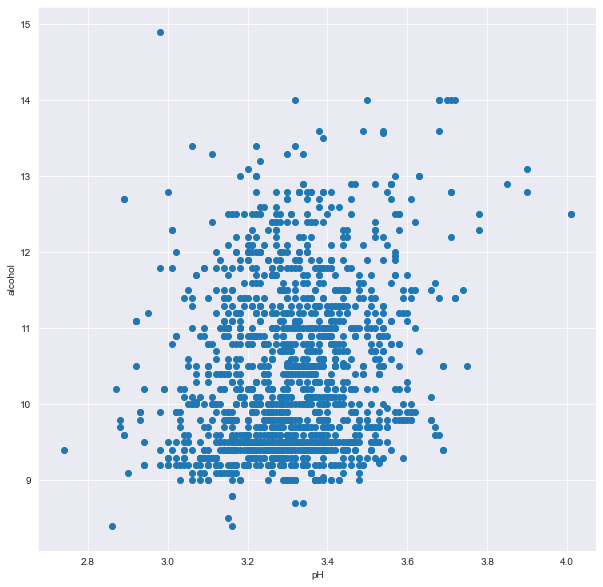

pH quality


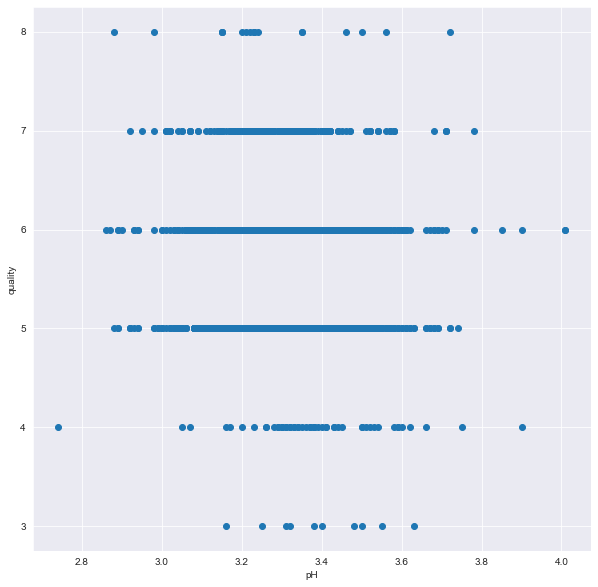

sulphates fixed acidity


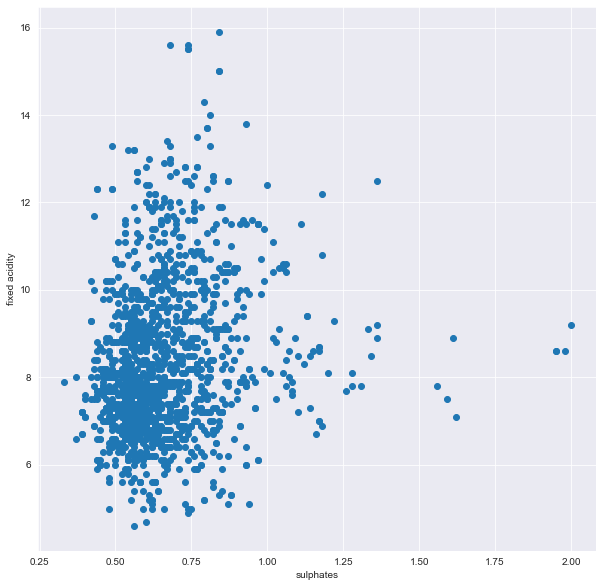

sulphates volatile acidity


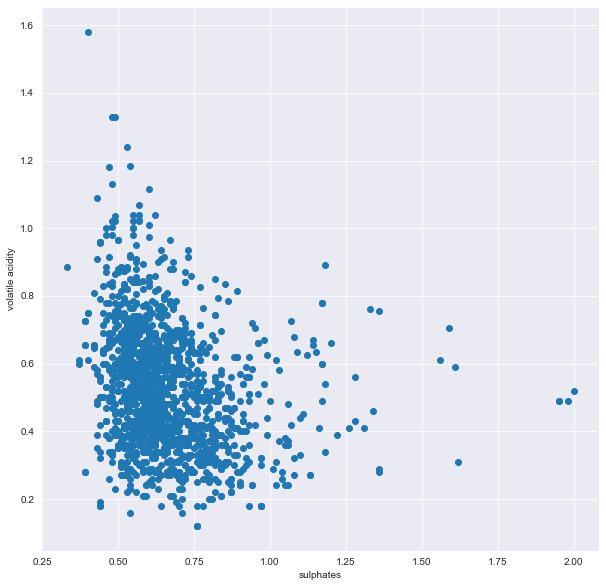

sulphates citric acid


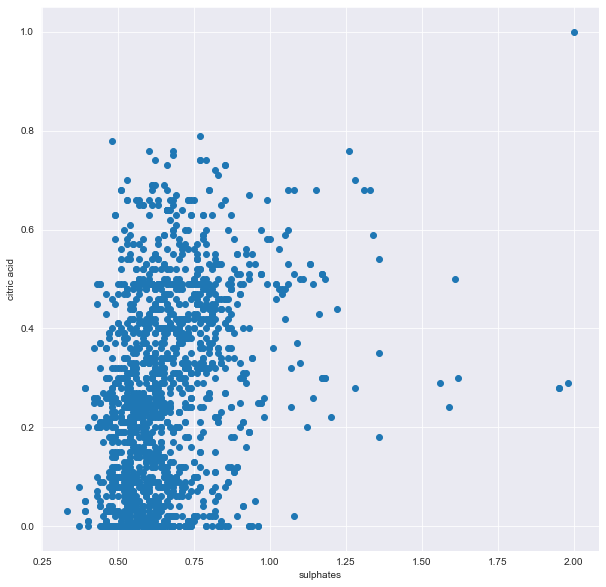

sulphates residual sugar


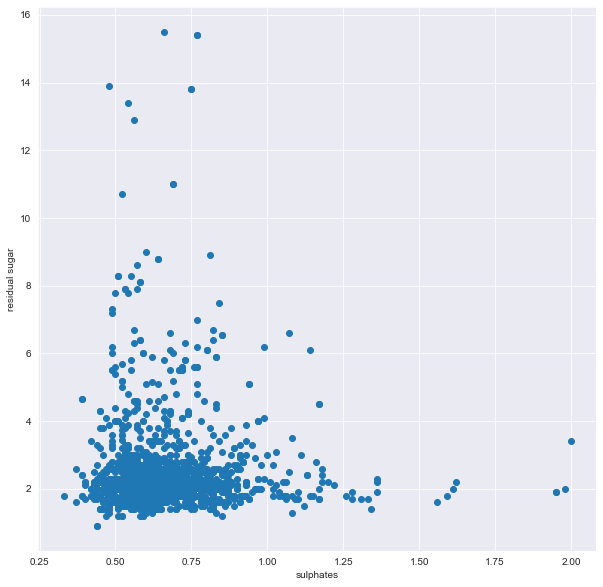

sulphates chlorides


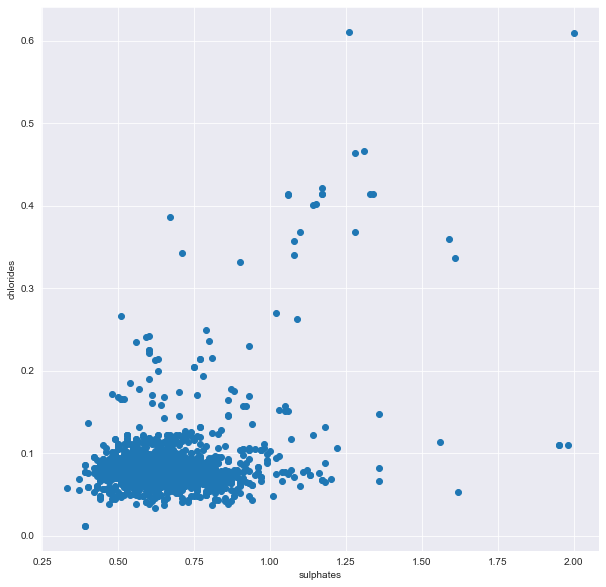

sulphates free sulfur dioxide


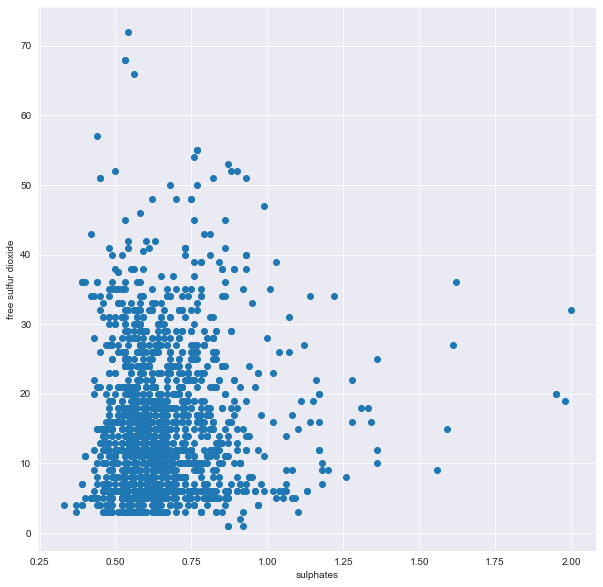

sulphates total sulfur dioxide


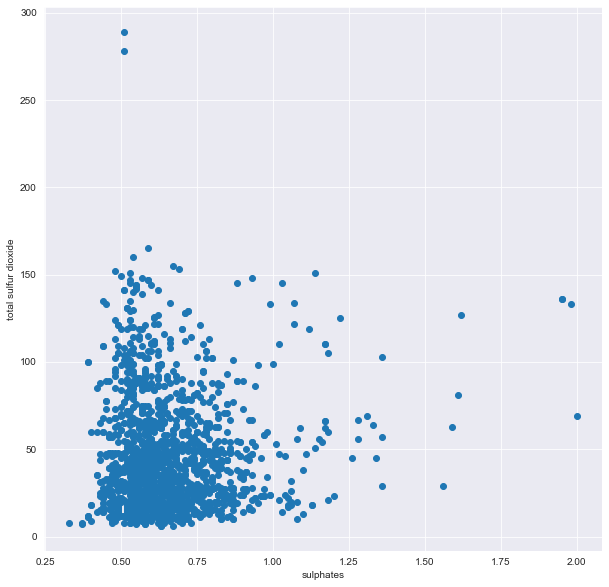

sulphates density


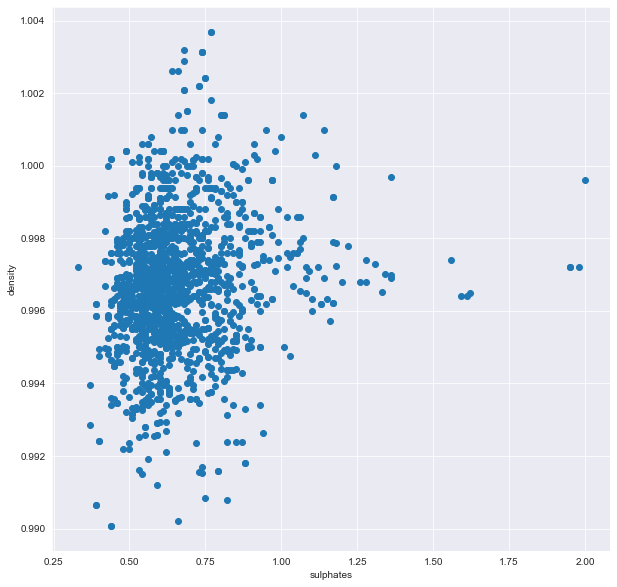

sulphates pH


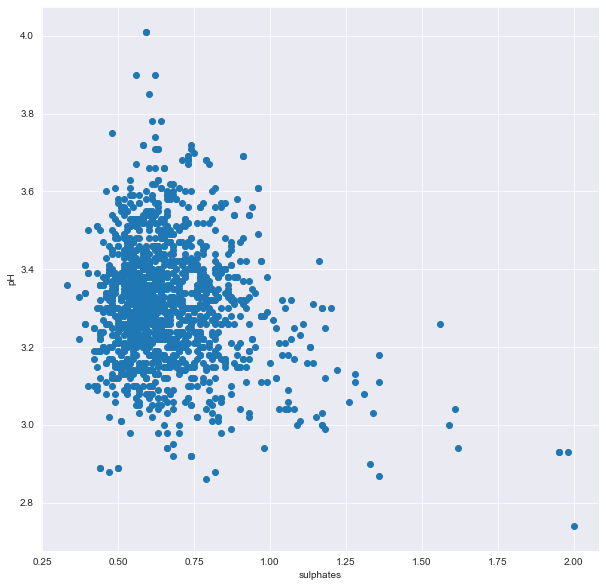

sulphates alcohol


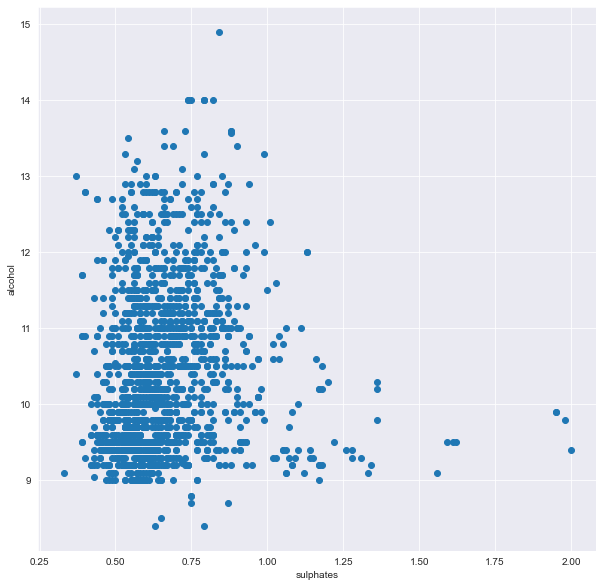

sulphates quality


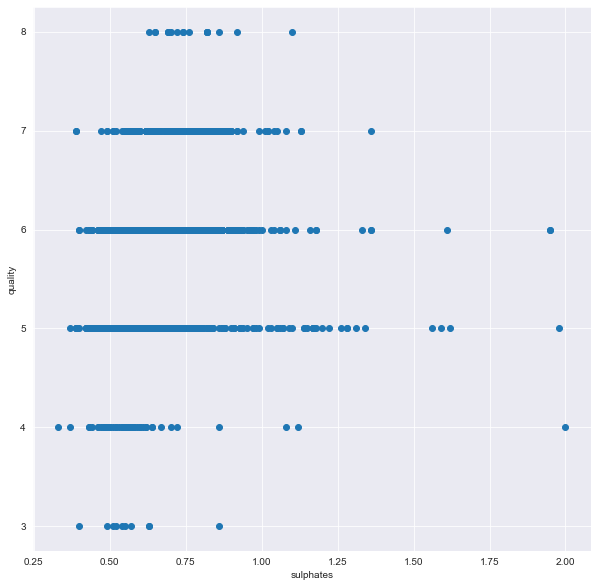

alcohol fixed acidity


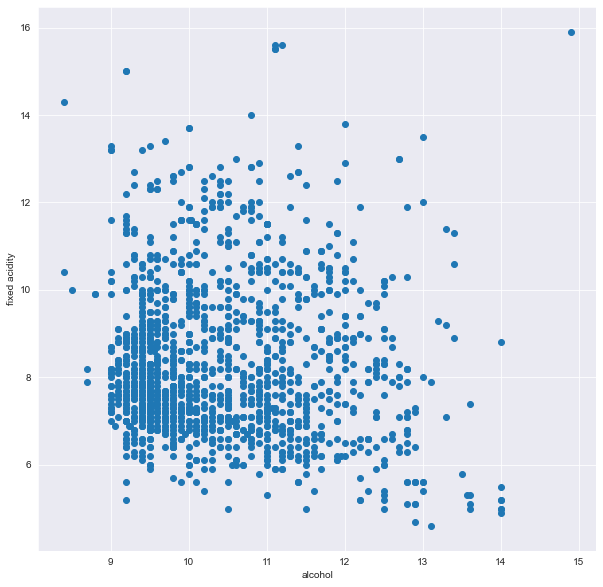

alcohol volatile acidity


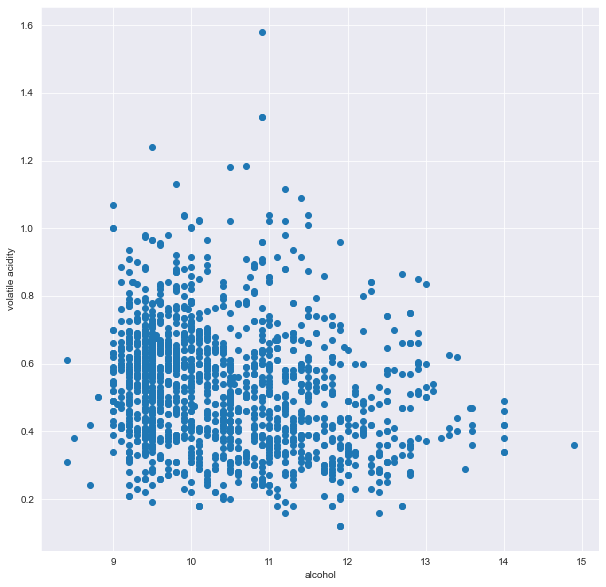

alcohol citric acid


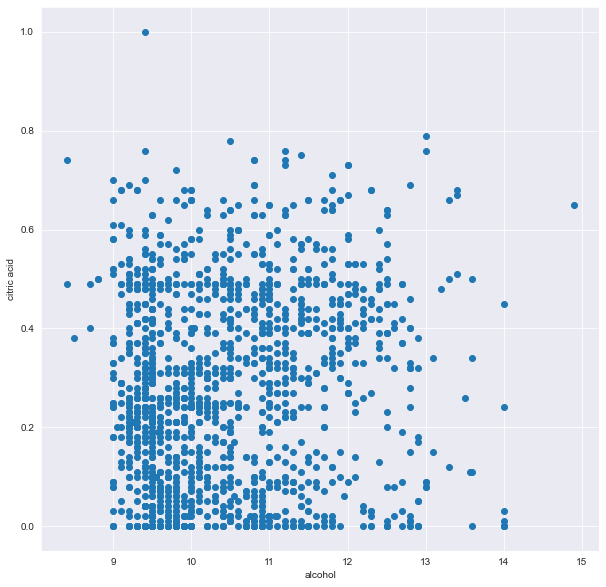

alcohol residual sugar


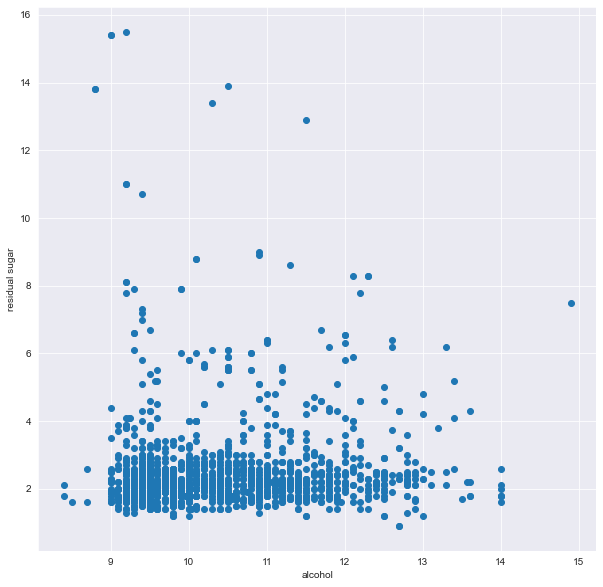

alcohol chlorides


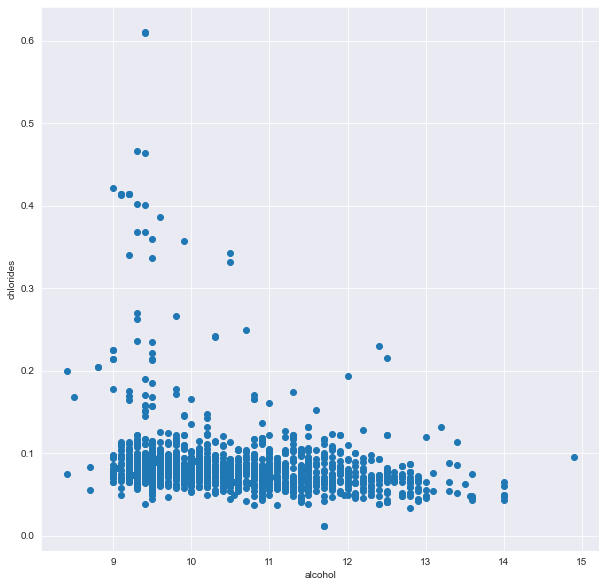

alcohol free sulfur dioxide


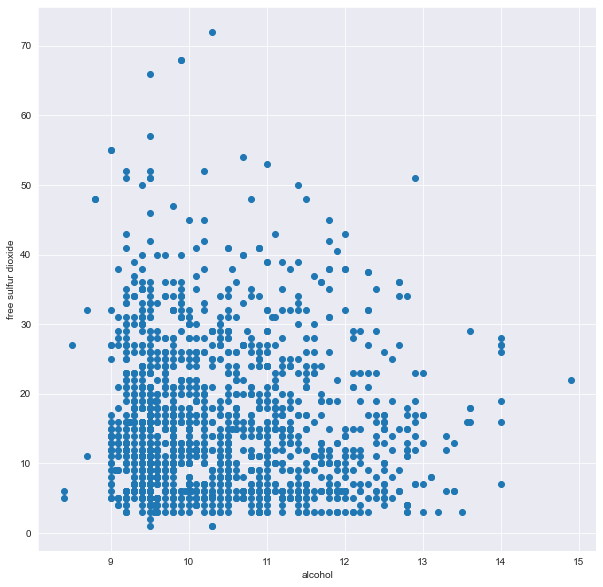

alcohol total sulfur dioxide


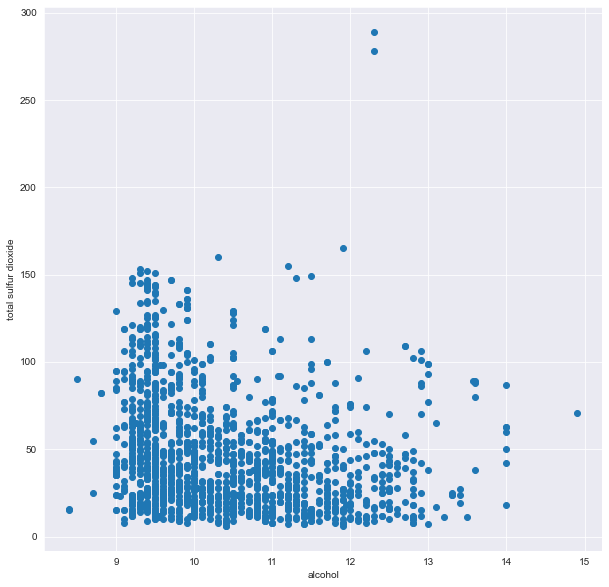

alcohol density


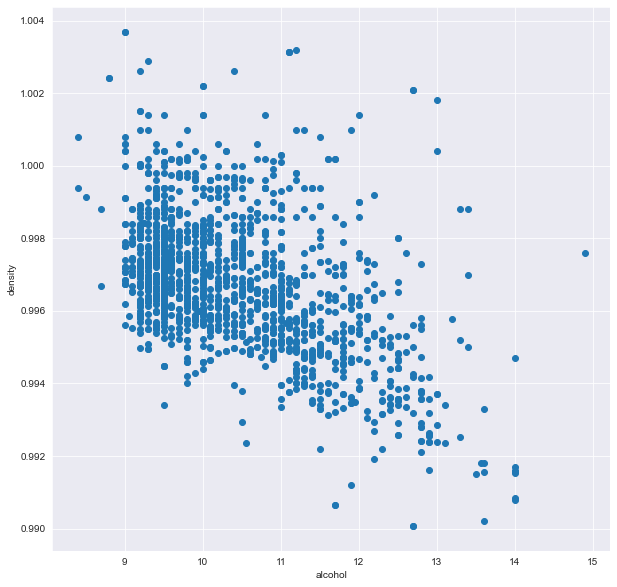

alcohol pH


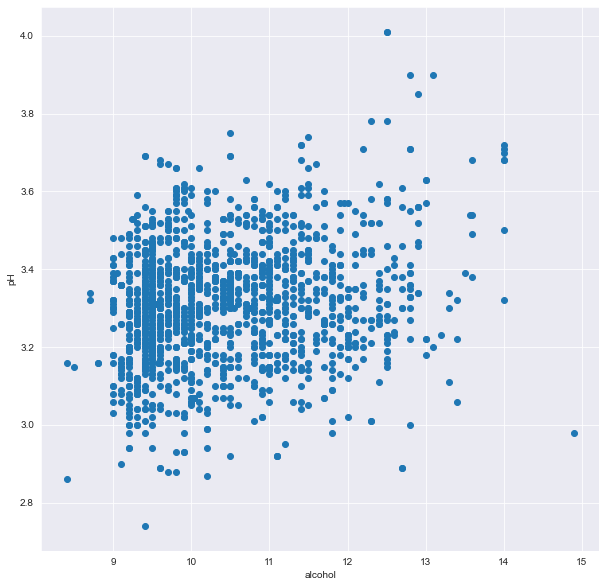

alcohol sulphates


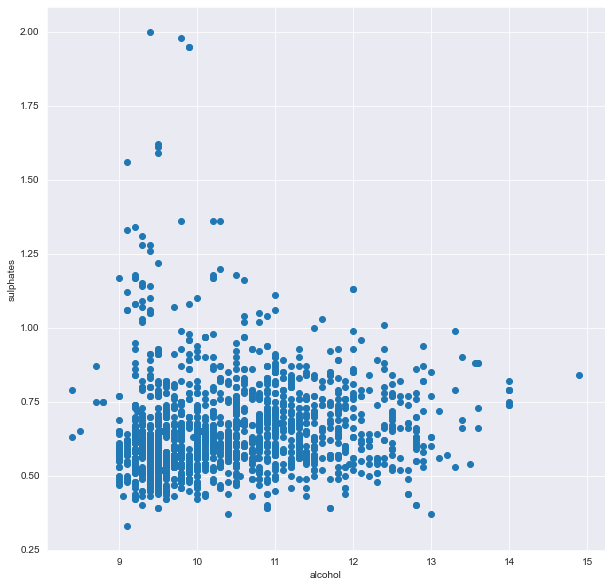

alcohol quality


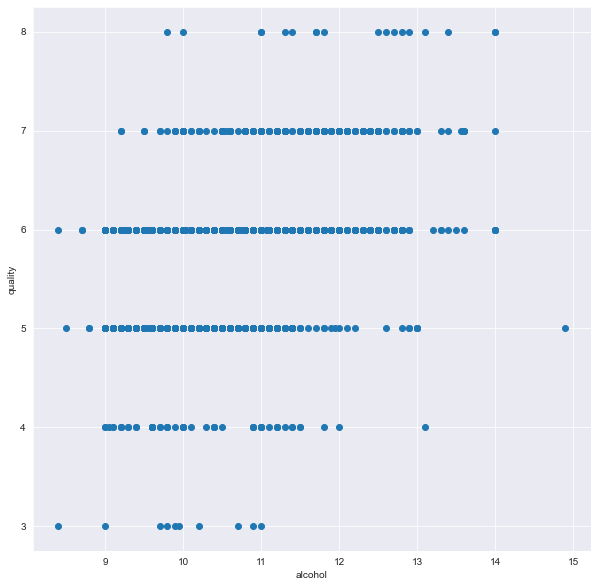

quality fixed acidity


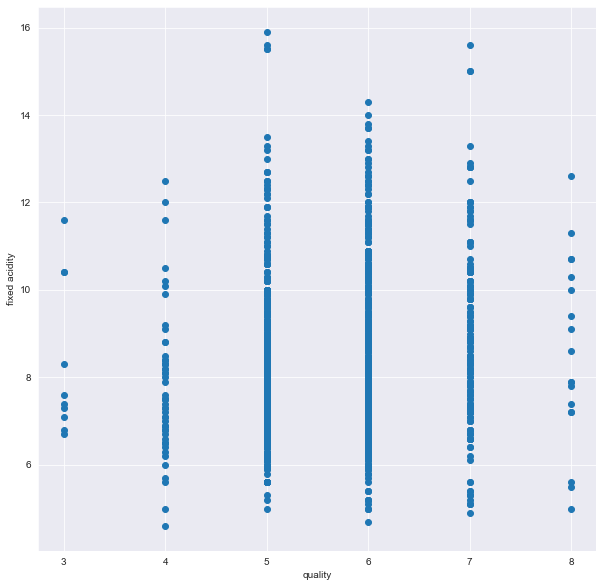

quality volatile acidity


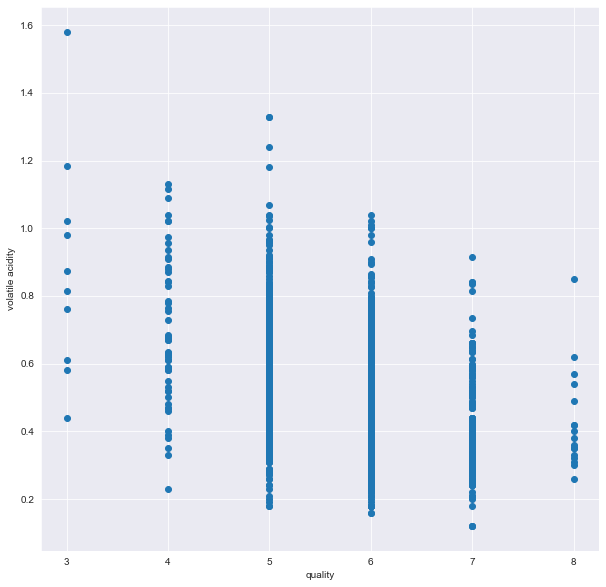

quality citric acid


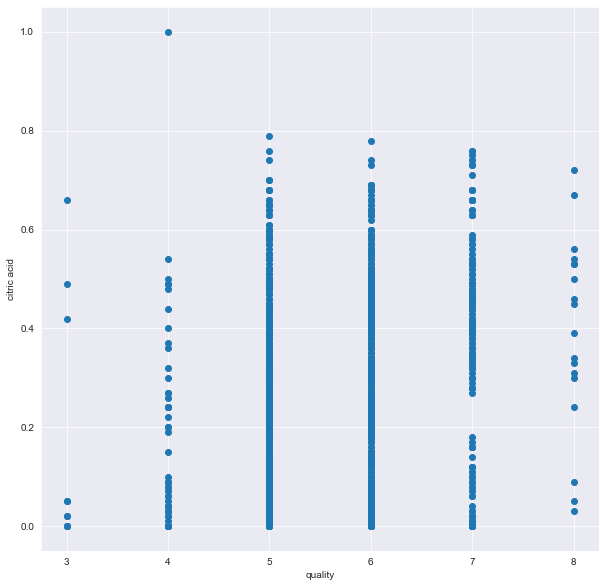

quality residual sugar


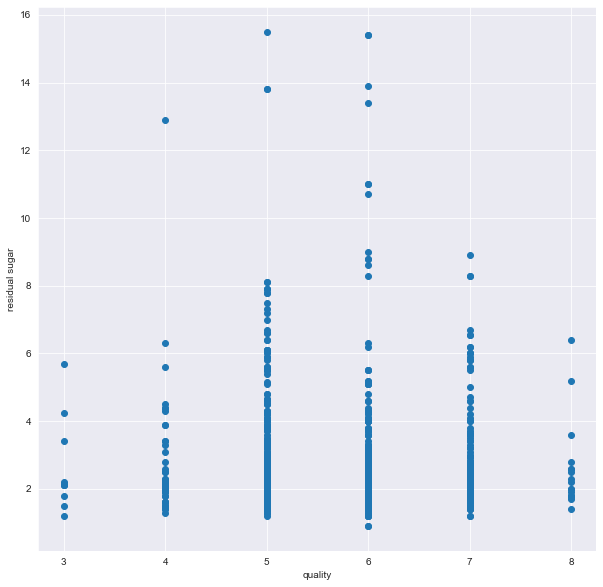

quality chlorides


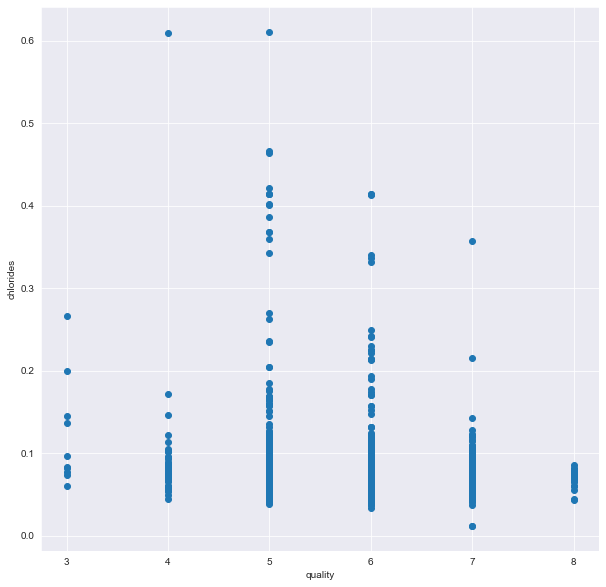

quality free sulfur dioxide


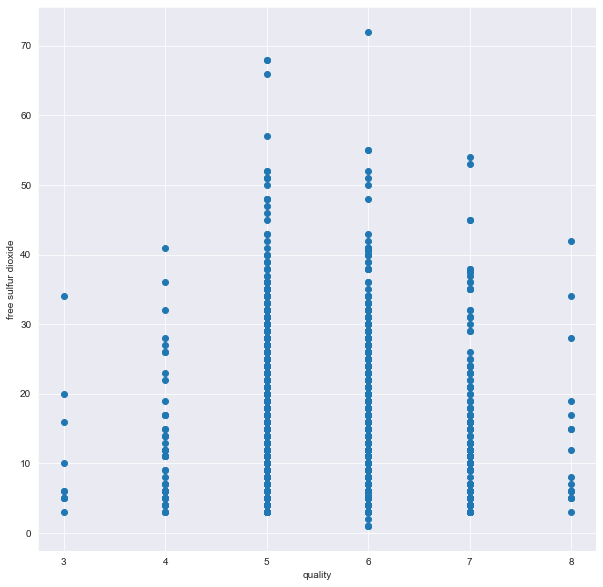

quality total sulfur dioxide


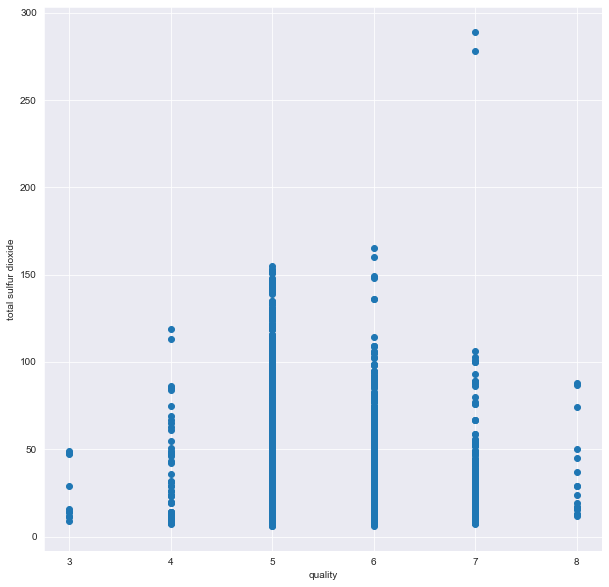

quality density


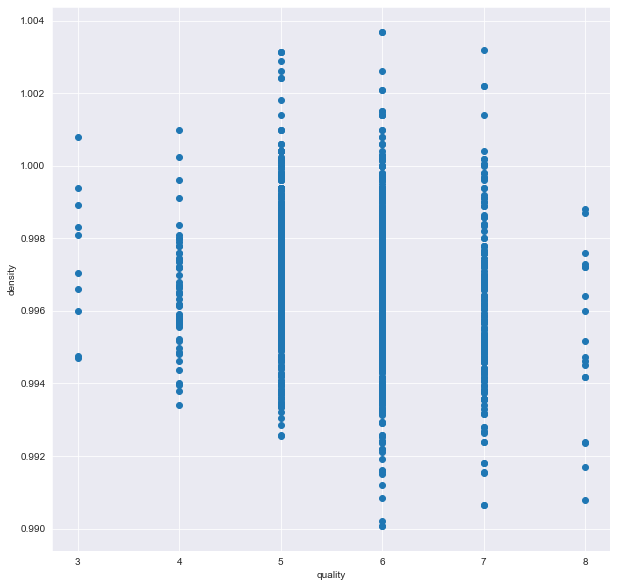

quality pH


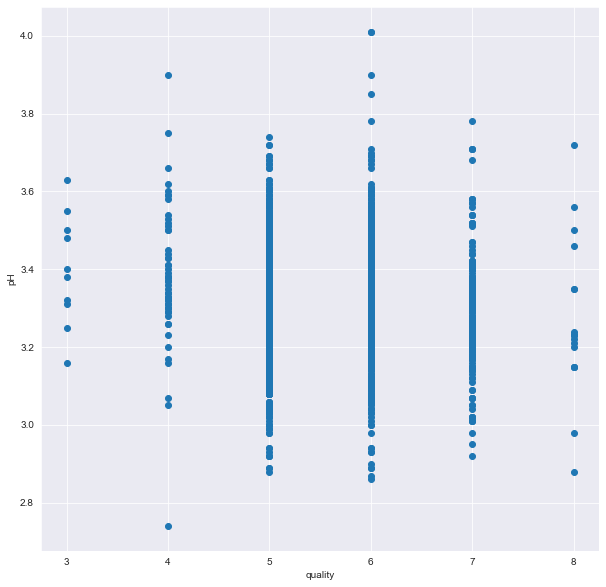

quality sulphates


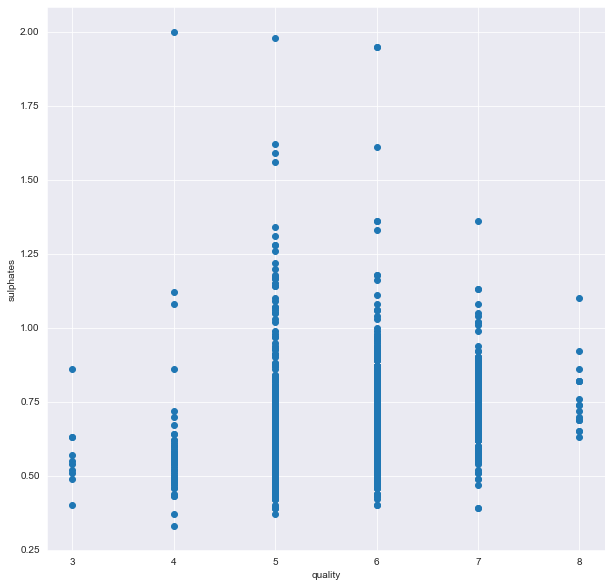

quality alcohol


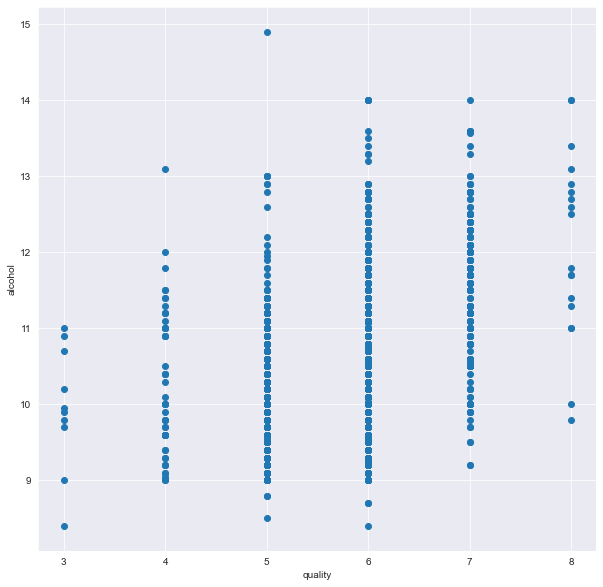

In [13]:
for i in df.columns:
    for j in df.columns:
        if i!=j:
            plt.scatter(df[i],df[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(print(i,j))
            plt.show()


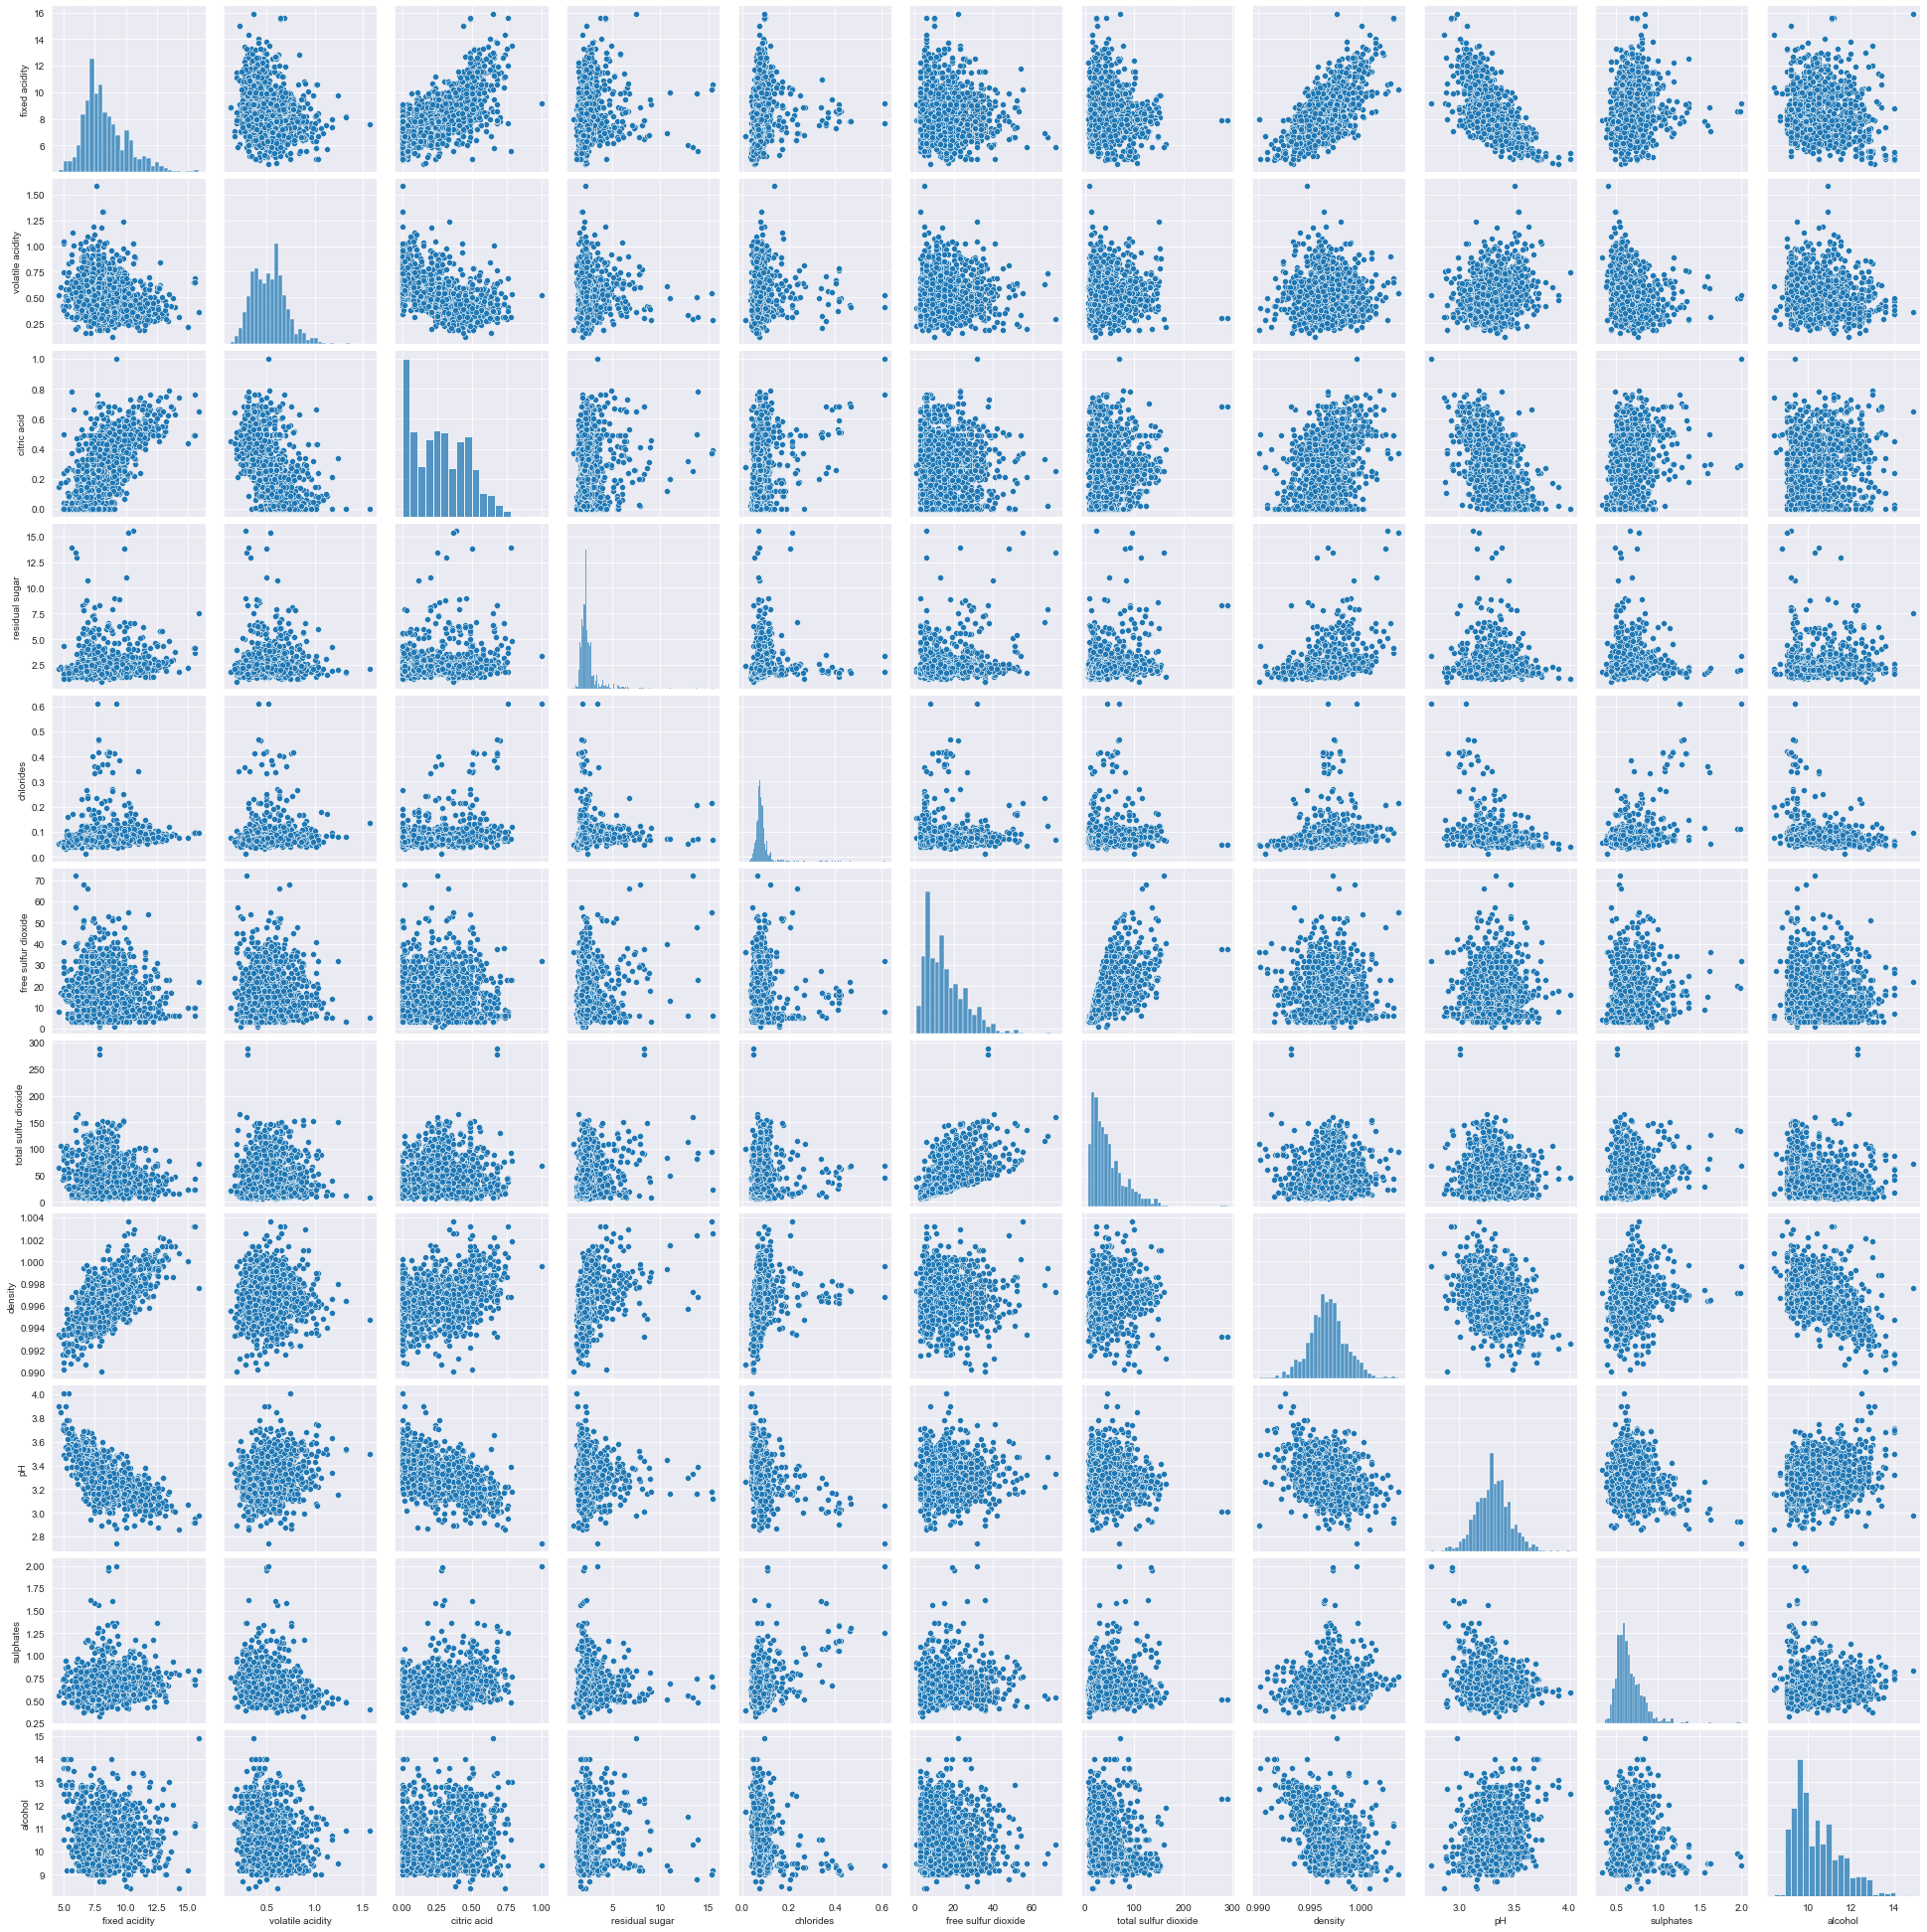

In [14]:
#another way to do this is using pairplot from awboen
sns.pairplot(df.drop(('quality'),axis=1))
plt.rcParams['figure.figsize']=10,10

A few of the scatter plots show very strong correlations. Lets check a few using regression and residual plots

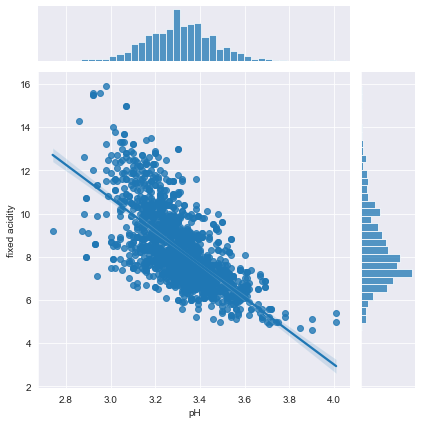

In [15]:
#initialize a joint grid
GridA = sns.JointGrid(x='pH',y='fixed acidity',data=df)
#plot a regression line on the grid
GridA = GridA.plot_joint(sns.regplot)
#add univariate plots on marginal axes
GridA = GridA.plot_marginals(sns.histplot)

<AxesSubplot:xlabel='pH', ylabel='fixed acidity'>

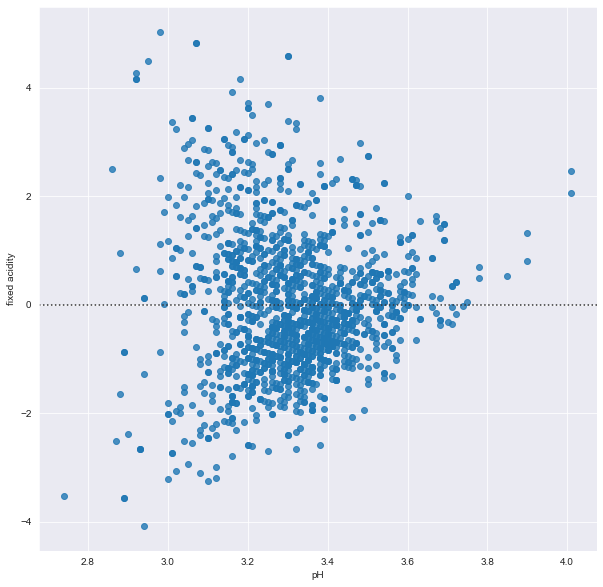

In [16]:
#make a regression plot
sns.residplot(x='pH',y='fixed acidity',data=df)

Not a great fit at the extreme ends (up and down), which means there is some heterosckedasticity

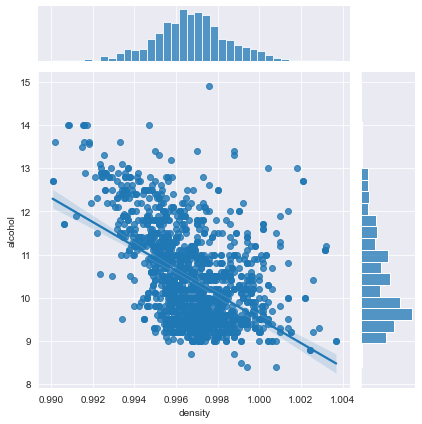

In [17]:
#initialize a joint grid
GridA = sns.JointGrid(x='density',y='alcohol',data=df)
#plot a regression line on the grid
GridA = GridA.plot_joint(sns.regplot)
#add univariate plots on marginal axes
GridA = GridA.plot_marginals(sns.histplot)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

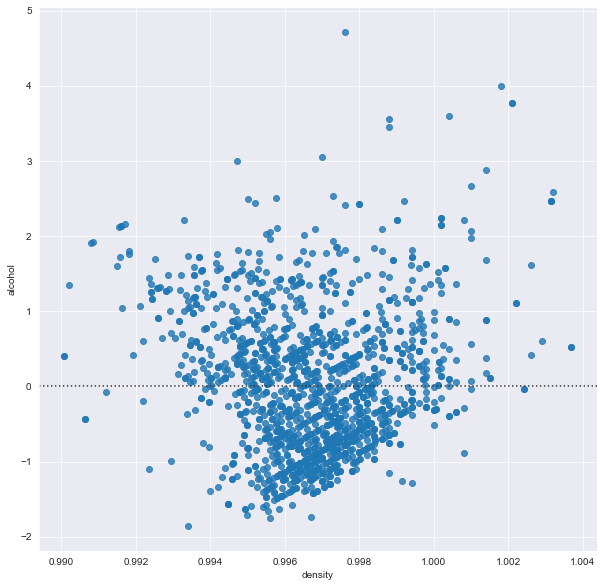

In [18]:
#make a regression plot
sns.residplot(x='density',y='alcohol',data=df)

Model looks biased as the lower errors are in the middle portion

### Step 3 - EDA on categorical values

In this case, quality can be seen as a numeric or a categorical value. Lets consider it a categorical value

In [19]:
#check counts by each quality rating
df.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

/Users/guransingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

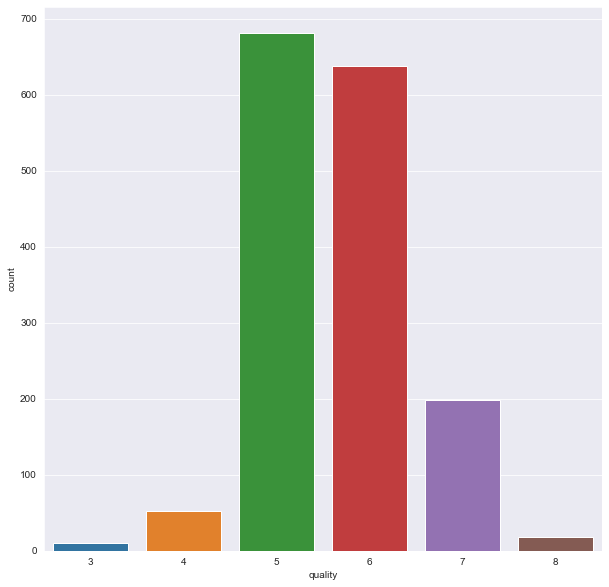

In [20]:
#another way to look at this is using seaborn countplot
sns.countplot('quality',data=df)

### Step 3.a Bar Plots (cross-investigation on categorical and Numerical EDA)

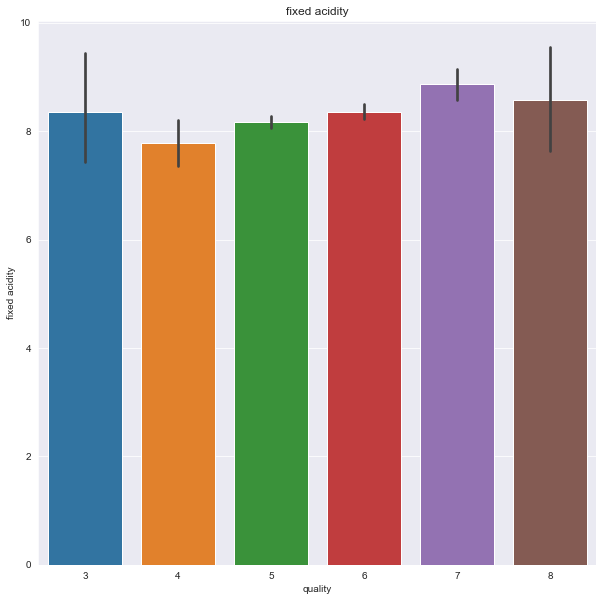

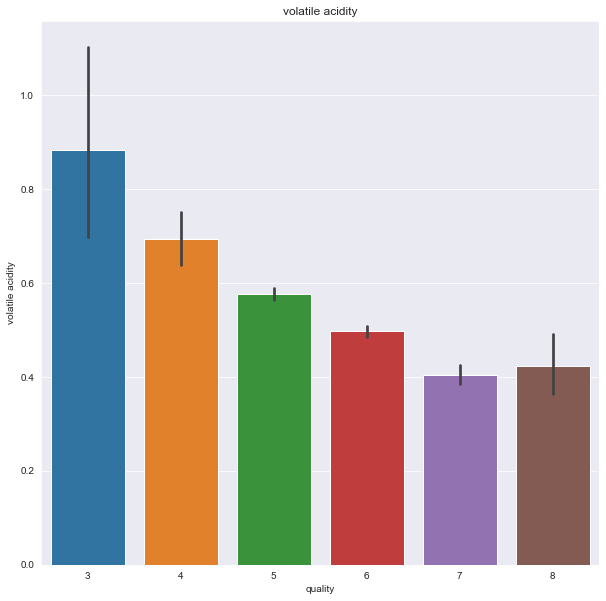

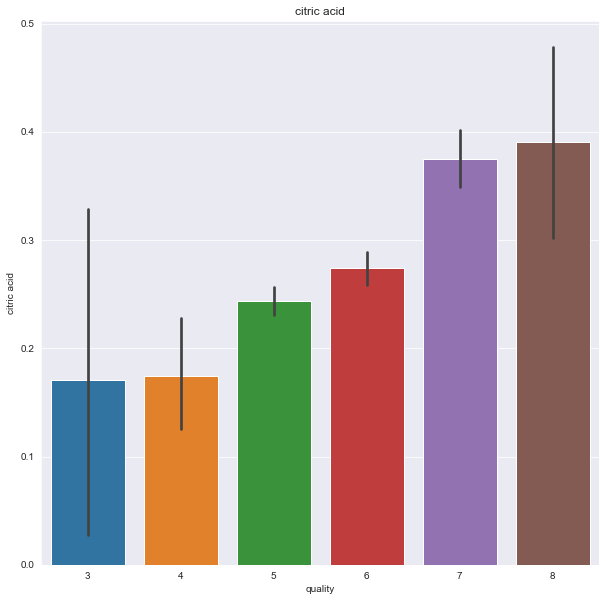

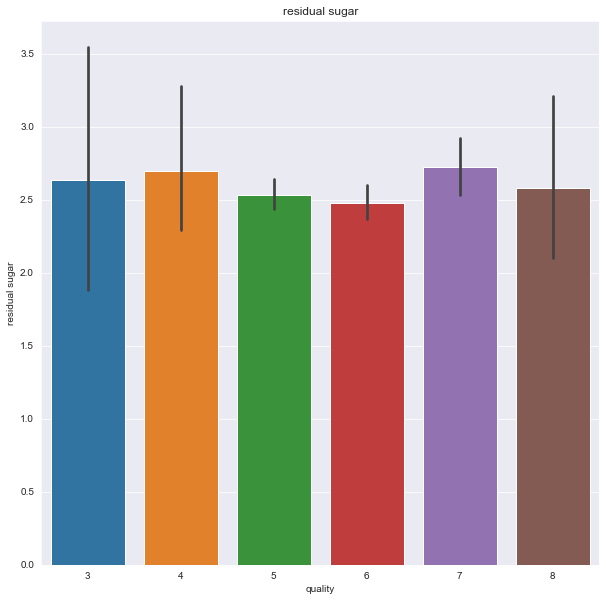

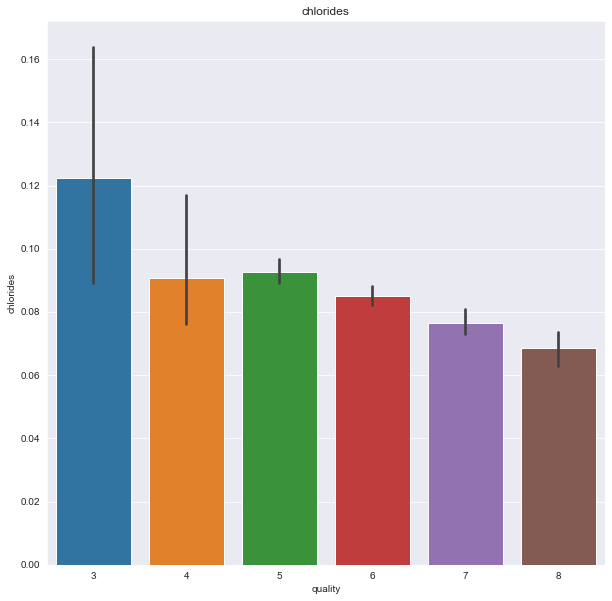

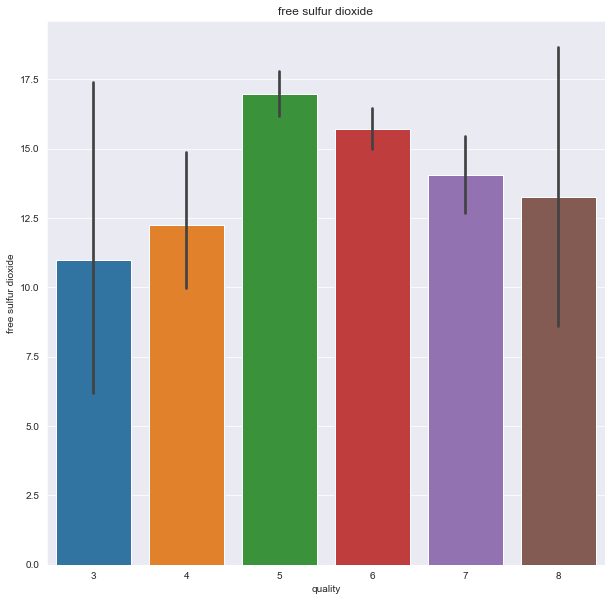

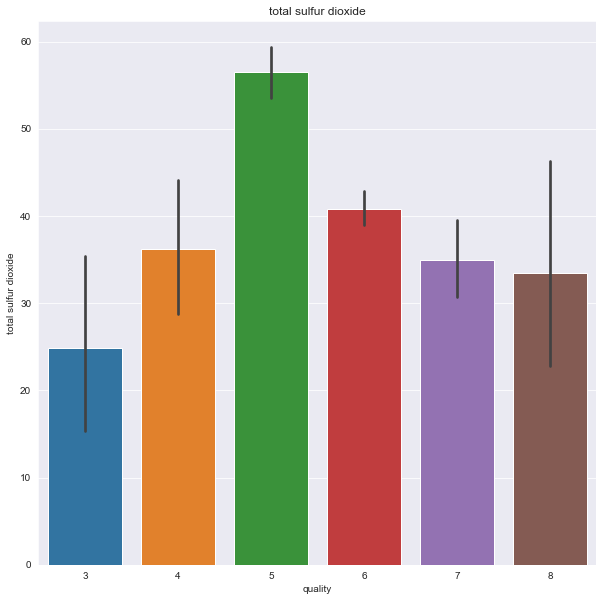

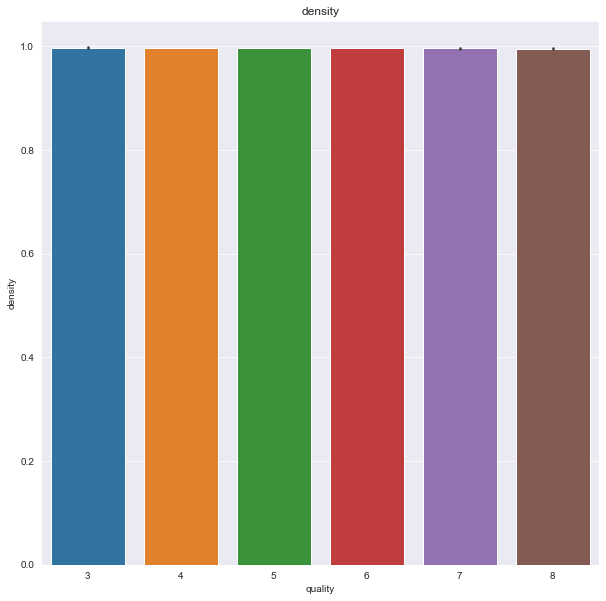

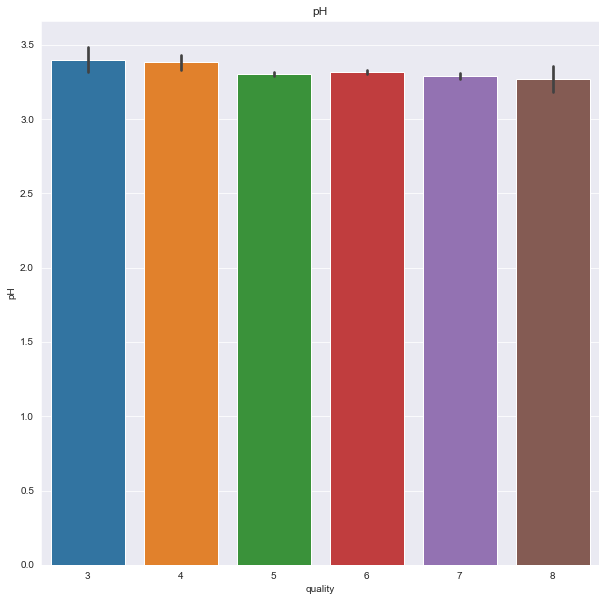

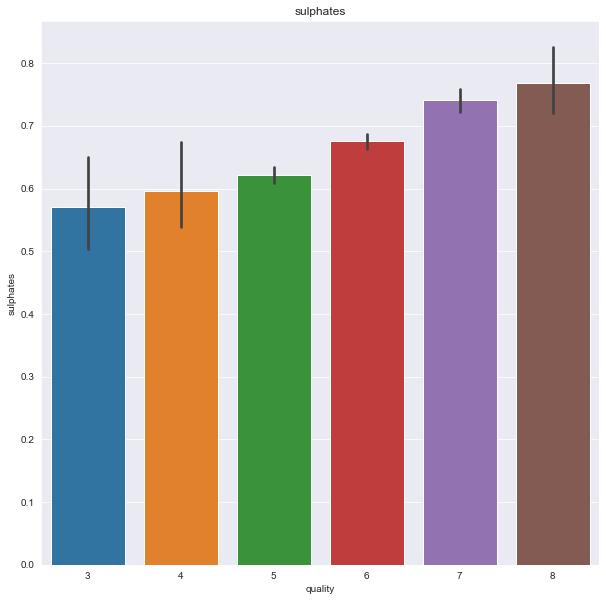

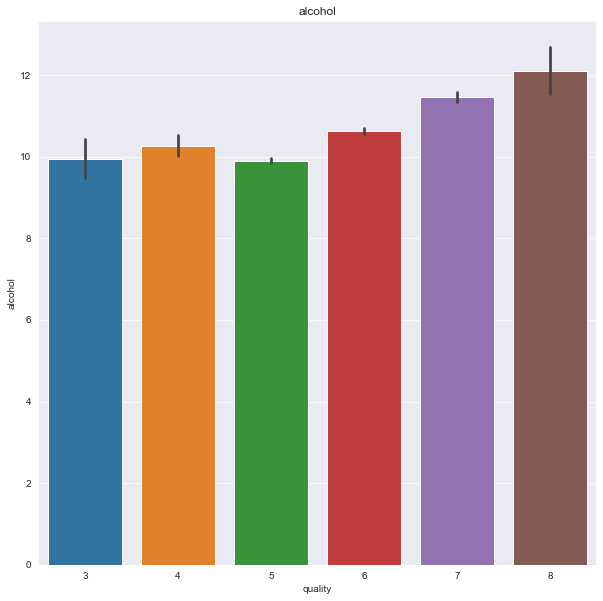

In [21]:
#barplot groups based on x axis and then puts the mean for each category
for i in df.columns:
    if i != 'quality':
        sns.barplot(x='quality',y=df[i],data=df)
        plt.title(i)
        plt.show()